In [1]:
# use python 3.6 or 3.7 environment

In [2]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt

#%matplotlib inline
%matplotlib notebook
#%matplotlib nbagg

p='/dls/i16/data/2020/cm26473-2/%i.nxs'

=== Importing dlstools package


In [3]:
pd.set_option('display.max_rows',9999)
def showscans(scans, metadata = []):
    # md is metadata list e.g. ['entry1/sample/name']
    _scanlist =[]
    for scan in scans:
        _n = pdnx(p % scan)
        dic = {}
        dic['scan'] = scan
        dic['length'] = len(_n)
        dic['command'] = _n.nx.entry1.scan_command
        dic['start_time'] = _n.nx.entry1.start_time
        for meta in metadata:
            dic[meta.split('/')[-1]] = _n.nx[meta]   
            
        _scanlist += [dic]
        
    return pd.DataFrame(_scanlist)

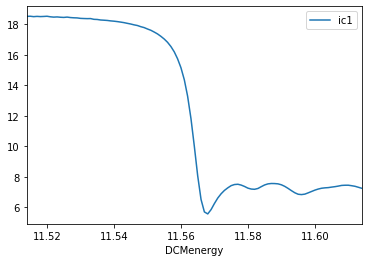

In [4]:
n = pdnx(p % 823290) # energy calibration (0.2 eV change but previous was noisy)
n.plot('DCMenergy','ic1')

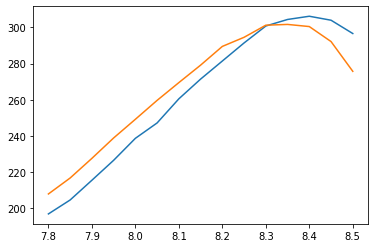

In [5]:
n = pdnx(p % 823310) # Rh coating
figure()
plot(n.DCMenergy,n.diode)
n = pdnx(p % 823311) # Si coating
plot(n.DCMenergy,n.diode)

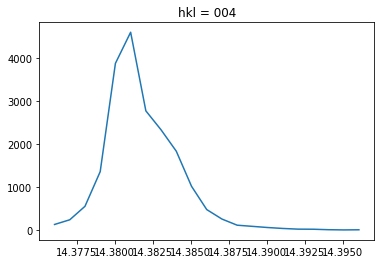

In [6]:
n = pdnx(p % 823317) # atten 200 7.5e-9
figure()
plot(n.eta,n['sum']); title('hkl = 004')
n = pdnx(p % 823311) #  atten 170 7.6e-8


Text(0.5, 1.0, 'hkl = 022')

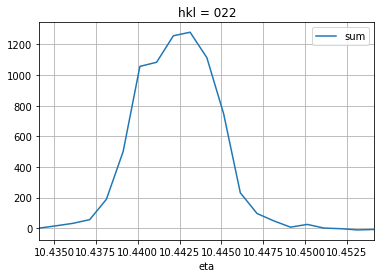

In [7]:
n = pdnx(p % 823324) # atten 170 7.6e-8
n.plt('eta','sum'); title('hkl = 022')

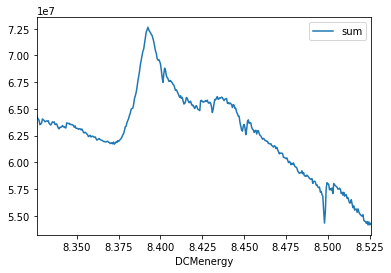

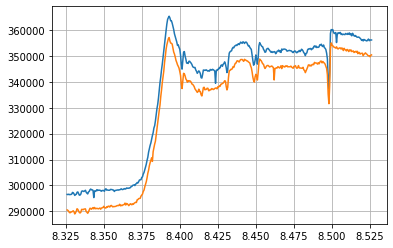

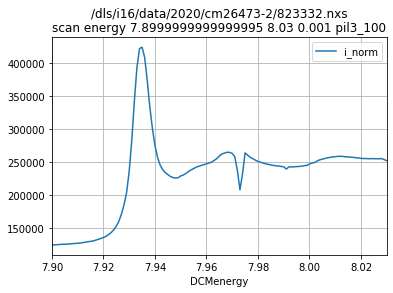

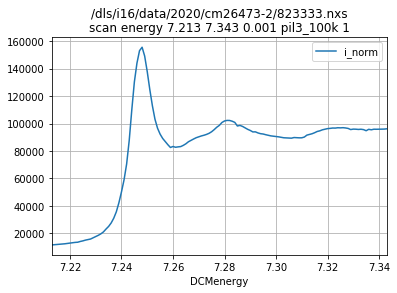

In [8]:
n = pdnx(p % 823329) # L1
n['i_norm'] = n['sum']/n.ic1monitor
n.plot('DCMenergy', 'sum')
figure()
plot(n['DCMenergy'], n['i_norm'])
n = pdnx(p % 823330) # L1
n['i_norm'] = n['sum']/n.ic1monitor
plot(n['DCMenergy'], n['i_norm']); grid(1)

n = pdnx(p % 823332) # L2
n['i_norm'] = n['sum']/n.ic1monitor
n.plt('DCMenergy', 'i_norm')

n = pdnx(p % 823333) # L3
n['i_norm'] = n['sum']/n.ic1monitor
n.plt('DCMenergy', 'i_norm')


Text(0.5, 1.0, 'scan pil3_tresh 5 9 0.1 pil3_100k 1  L3')

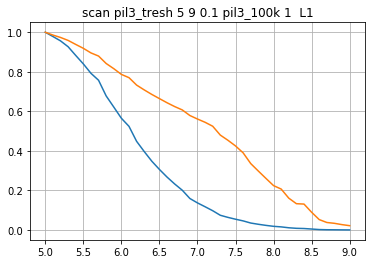

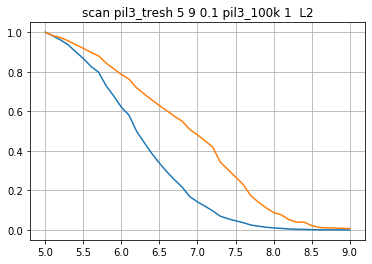

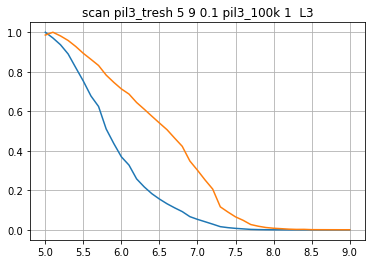

In [9]:
n = pdnx(p % 823335) # L1 E=8.39 keV
n['norm_sum'] = n['sum']/max(n['sum'])
figure()
plot(n.pil3_tresh, n.norm_sum)
n = pdnx(p % 823340) # L1 E=7.935 keV nominal [004] atten 50
n['norm_sum'] = n['sum']/max(n['sum'])
plot(n.pil3_tresh, n.norm_sum); grid(1)
title(n.nx.entry1.title + '  L1')

n = pdnx(p % 823336) # L2 E=7.935 keV
n['norm_sum'] = n['sum']/max(n['sum'])
figure()
plot(n.pil3_tresh, n.norm_sum)
n = pdnx(p % 823339) # L2 E=7.935 keV nominal [004] atten 50
n['norm_sum'] = n['sum']/max(n['sum'])
plot(n.pil3_tresh, n.norm_sum); grid(1)
title(n.nx.entry1.title + '  L2')

n = pdnx(p % 823337) # L3 E=7.248 keV
n['norm_sum'] = n['sum']/max(n['sum'])
figure()
plot(n.pil3_tresh, n.norm_sum)
n = pdnx(p % 823338) # L3 E=7.248 keV nominal [004] atten 50
n['norm_sum'] = n['sum']/max(n['sum'])
plot(n.pil3_tresh, n.norm_sum); grid(1)
title(n.nx.entry1.title + '  L3')


In [10]:
showscans(range(823364, 823483+1))

command  length    scan                     start_time
0    scan eta 20.931272102811946 21.13127210281195 ...      41  823364  2020-07-14T17:12:05.478+01:00
1    scan chi 89.35441462626818 90.35441462626818 0...      21  823365  2020-07-14T17:13:42.129+01:00
2    scan eta 21.02127210281294 21.041272102812943 ...      21  823366  2020-07-14T17:14:32.142+01:00
3    scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823367   2020-07-14T17:15:15.65+01:00
4    scan eta 22.18501356543095 22.385013565430953 ...      41  823368  2020-07-14T17:24:48.077+01:00
5    scan chi 89.35441462626818 90.35441462626818 0...      21  823369  2020-07-14T17:26:24.089+01:00
6    scan eta 22.27001356543195 22.290013565431952 ...      21  823370  2020-07-14T17:27:13.899+01:00
7    scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823371  2020-07-14T17:27:58.342+01:00
8    scan eta 24.438620193379947 24.63862019337995 ...      41  823372  2020-07-14T17:37:36.496+01:00
9    scan chi 89.35441462626818 90.35441462626818 0...      21  823373  2020-07-14T17:39:13.735+01:00
10   scan eta 24.523620193380946 24.54362019338095 ...      21  823374  2020-07-14T17:40:28.598+01:00
11   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823375  2020-07-14T17:41:12.422+01:00
12   scan eta 20.933808870272273 21.133808870272276...      41  823376  2020-07-14T17:50:50.698+01:00
13   scan chi 89.35490120387247 90.35490120387247 0...      21  823377  2020-07-14T17:52:24.577+01:00
14   scan eta 21.018808870272277 21.03880887027228 ...      21  823378   2020-07-14T17:53:14.75+01:00
15   scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823379  2020-07-14T17:53:57.883+01:00
16   scan eta 22.187550332891277 22.38755033289128 ...      41  823380  2020-07-14T18:03:31.845+01:00
17   scan chi 89.35490120387247 90.35490120387247 0...      21  823381  2020-07-14T18:05:10.844+01:00
18   scan eta 22.27255033289128 22.292550332891285 ...      21  823382  2020-07-14T18:06:00.797+01:00
19   scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823383  2020-07-14T18:06:44.572+01:00
20   scan eta 24.44115696084127 24.641156960841272 ...      41  823384  2020-07-14T18:16:23.293+01:00
21   scan chi 89.35490120387247 90.35490120387247 0...      21  823385  2020-07-14T18:17:57.087+01:00
22   scan eta 24.521156960841278 24.54115696084128 ...      21  823386   2020-07-14T18:18:47.09+01:00
23   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823387  2020-07-14T18:19:31.053+01:00
24   scan eta 20.93633675930704 21.136336759307042 ...      41  823388  2020-07-14T18:29:19.074+01:00
25   scan chi 89.35543198005905 90.35543198005905 0...      21  823389  2020-07-14T18:31:15.716+01:00
26   scan eta 21.01633675930705 21.03633675930705 0...      21  823390  2020-07-14T18:32:05.796+01:00
27   scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823391  2020-07-14T18:32:49.215+01:00
28   scan eta 22.19007822192704 22.39007822192704 0...      41  823392  2020-07-14T18:42:14.958+01:00
29   scan chi 89.35543198005905 90.35543198005905 0...      21  823393  2020-07-14T18:43:54.422+01:00
30   scan eta 22.270078221927047 22.29007822192705 ...      21  823394  2020-07-14T18:44:44.869+01:00
31   scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823395  2020-07-14T18:45:29.234+01:00
32   scan eta 24.44368484987605 24.643684849876053 ...      41  823396  2020-07-14T18:55:07.157+01:00
33   scan chi 89.35543198005905 90.35543198005905 0...      21  823397  2020-07-14T18:56:47.436+01:00
34   scan eta 24.51868484987605 24.538684849876052 ...      21  823398  2020-07-14T18:57:37.385+01:00
35   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823399  2020-07-14T18:58:21.362+01:00
36   scan eta 20.938854999890275 21.138854999890277...      41  823400  2020-07-14T19:07:56.184+01:00
37   scan chi 89.35600679314452 90.35600679314452 0...      21  823401  2020-07-14T19:09:30.234+01:00
38   scan eta 21.013854999890274 21.033854999890277...      21  82340

(0, 10000000.0)

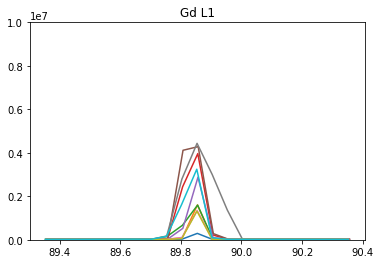

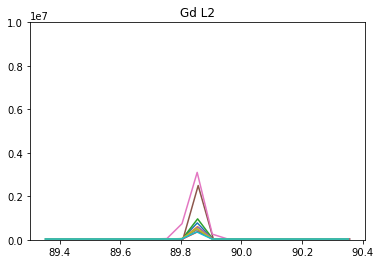

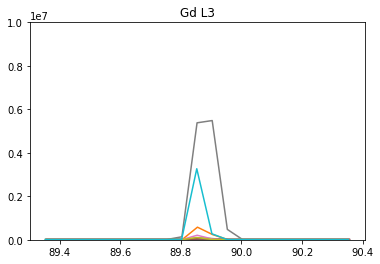

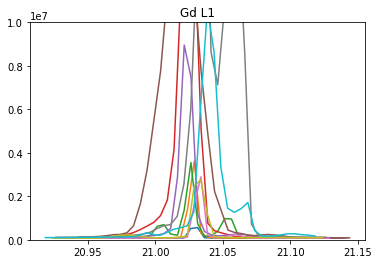

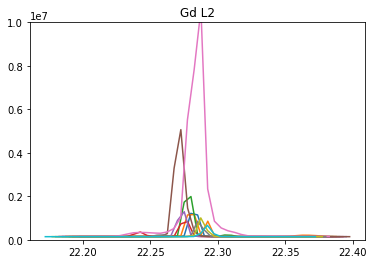

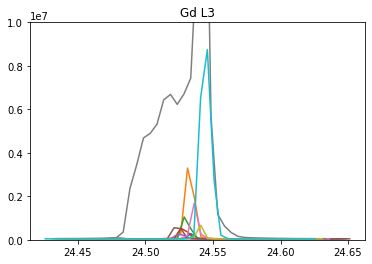

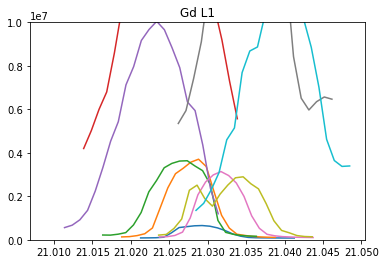

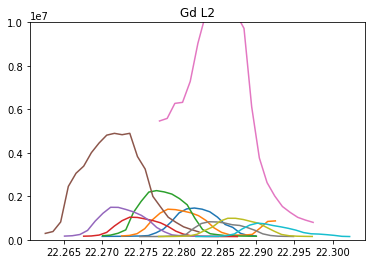

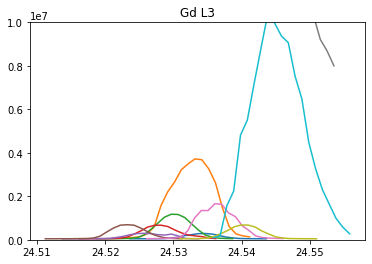

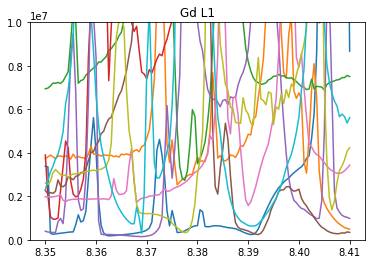

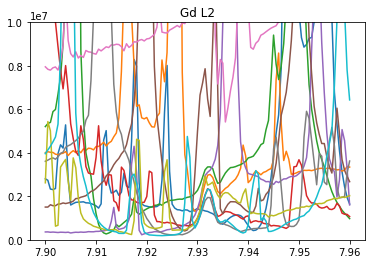

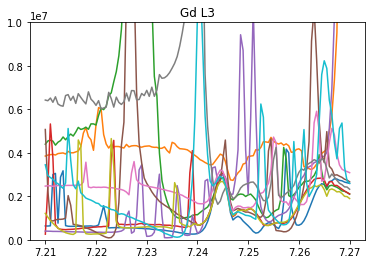

In [11]:
#alignment and energy scans, L1, L2, L3. Lots of multiple scattering!

en_l1_scans = range(823367, 823475+1, 12)
en_l2_scans = range(823371, 823479+1, 12)
en_l3_scans = range(823375, 823483+1, 12)
eta_fine_l1_scans = range(823366 , 823474+1, 12)
eta_fine_l2_scans = range(823370, 823478+1, 12)
eta_fine_l3_scans = range(823374, 823482+1, 12)
eta_l1_scans = range(823364 , 823472+1, 12)
eta_l2_scans = range(823368, 823476+1, 12)
eta_l3_scans = range(823372, 823480+1, 12)
chi_l1_scans = range(823365 , 823473+1, 12)
chi_l2_scans = range(823369, 823477+1, 12)
chi_l3_scans = range(823373, 823481+1, 12)

figure()
for scan in chi_l1_scans:
    n = pdnx(p % scan)
    plot(n.chi, n.schiroi_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in chi_l2_scans:
    n = pdnx(p % scan)
    plot(n.chi, n.schiroi_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in chi_l3_scans:
    n = pdnx(p % scan)
    plot(n.chi, n.schiroi_sum)
    title('Gd L3')    
ylim([0,1e7])

figure()
for scan in eta_l1_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in eta_l2_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in eta_l3_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])

figure()
for scan in eta_fine_l1_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in eta_fine_l2_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in eta_fine_l3_scans:
    n = pdnx(p % scan)
    plot(n.eta, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])


figure()
for scan in en_l1_scans:
    n = pdnx(p % scan)
    plot(n.DCMenergy, n.roi1_sum)
    title('Gd L1')    
ylim([0,1e7])

figure()
for scan in en_l2_scans:
    n = pdnx(p % scan)
    plot(n.DCMenergy, n.roi1_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in en_l3_scans:
    n = pdnx(p % scan)
    plot(n.DCMenergy, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])

In [12]:
showscans(range(823504, 823640+1))

command  length    scan                     start_time
0    scan eta 20.81725180660414 21.117251806604138 ...      61  823504  2020-07-15T10:42:40.881+01:00
1    scan chi 89.35680910427088 90.35680910427088 0...      21  823505  2020-07-15T10:44:25.587+01:00
2    scan eta 21.062251806604696 21.0822518066047 0...      21  823506  2020-07-15T10:45:05.473+01:00
3    scan psi 18.0 22.0 0.05 hkl [0.008640045276201...      81  823507  2020-07-15T10:45:40.298+01:00
4    scan eta 22.07099326922414 22.370993269224137 ...      61  823508  2020-07-15T10:48:12.628+01:00
5    scan chi 89.35680910427088 90.35680910427088 0...      21  823509  2020-07-15T10:49:44.969+01:00
6    scan eta 22.315993269224695 22.335993269224698...      21  823510  2020-07-15T10:50:49.095+01:00
7    scan psi 18.0 22.0 0.05 hkl [0.008344832514091...      81  823511  2020-07-15T10:51:24.256+01:00
8    scan eta 24.324599897173137 24.624599897173134...      61  823512   2020-07-15T10:53:58.56+01:00
9    scan chi 89.35680910427088 90.35680910427088 0...      21  823513  2020-07-15T10:55:28.887+01:00
10   scan eta 24.569599897174133 24.589599897174136...      21  823514  2020-07-15T10:56:08.518+01:00
11   scan psi 18.0 22.0 0.05 hkl [0.010135645797905...      81  823515  2020-07-15T10:56:42.814+01:00
12   scan eta 20.822271895896442 21.12227189589644 ...      61  823516  2020-07-15T10:59:19.368+01:00
13   scan chi 89.35559072340106 90.35559072340106 0...      21  823517  2020-07-15T11:01:23.223+01:00
14   scan eta 21.06227189589622 21.082271895896223 ...      21  823518  2020-07-15T11:02:03.916+01:00
15   scan psi 20.0 24.0 0.05 hkl [0.007456723484583...      81  823519  2020-07-15T11:02:39.205+01:00
16   scan eta 22.076013358516455 22.376013358516452...      61  823520  2020-07-15T11:05:15.558+01:00
17   scan chi 89.35559072340106 90.35559072340106 0...      21  823521  2020-07-15T11:06:49.548+01:00
18   scan eta 22.311013358516224 22.331013358516227...      21  823522  2020-07-15T11:07:32.224+01:00
19   scan psi 20.0 24.0 0.05 hkl [0.007456723484630...      81  823523  2020-07-15T11:08:08.658+01:00
20   scan eta 24.329619986465453 24.62961998646545 ...      61  823524  2020-07-15T11:11:14.434+01:00
21   scan chi 89.35559072340106 90.35559072340106 0...      21  823525   2020-07-15T11:12:50.23+01:00
22   scan eta 24.56461998646545 24.58461998646545 0...      21  823526  2020-07-15T11:13:32.799+01:00
23   scan psi 20.0 24.0 0.05 hkl [0.009223970062696...      81  823527  2020-07-15T11:14:07.554+01:00
24   scan eta 20.827331448460534 21.12733144846053 ...      61  823528  2020-07-15T11:16:49.028+01:00
25   scan chi 89.35454828330631 90.35454828330631 0...      21  823529  2020-07-15T11:18:24.376+01:00
26   scan eta 21.0573314484616 21.077331448461603 0...      21  823530  2020-07-15T11:19:07.184+01:00
27   scan psi 22.000000000000004 26.000000000000004...      81  823531  2020-07-15T11:19:42.258+01:00
28   scan eta 22.081072911079524 22.38107291107952 ...      61  823532  2020-07-15T11:22:43.171+01:00
29   scan chi 89.35454828330631 90.35454828330631 0...      21  823533  2020-07-15T11:24:14.988+01:00
30   scan eta 22.311072911080604 22.331072911080607...      21  823534  2020-07-15T11:24:55.024+01:00
31   scan psi 22.000000000000004 26.000000000000004...      81  823535  2020-07-15T11:25:30.124+01:00
32   scan eta 24.33467953902953 24.634679539029527 ...      61  823536  2020-07-15T11:28:11.296+01:00
33   scan chi 89.35454828330631 90.35454828330631 0...      21  823537  2020-07-15T11:29:42.372+01:00
34   scan eta 24.564679539030525 24.584679539030528...      21  823538  2020-07-15T11:30:48.025+01:00
35   scan psi 22.000000000000004 26.000000000000004...      81  823539  2020-07-15T11:31:22.714+01:00
36   scan eta 20.832424299941565 21.13242429994156 ...      61  823540  2020-07-15T11:34:01.611+01:00
37   scan chi 89.35368305406314 90.35368305406314 0...      21  823541  2020-07-15T11:35:31.655+01:00
38   scan eta 21.05742429994115 21.077424299941153 ...      21  82354

<IPython.core.display.Javascript object>


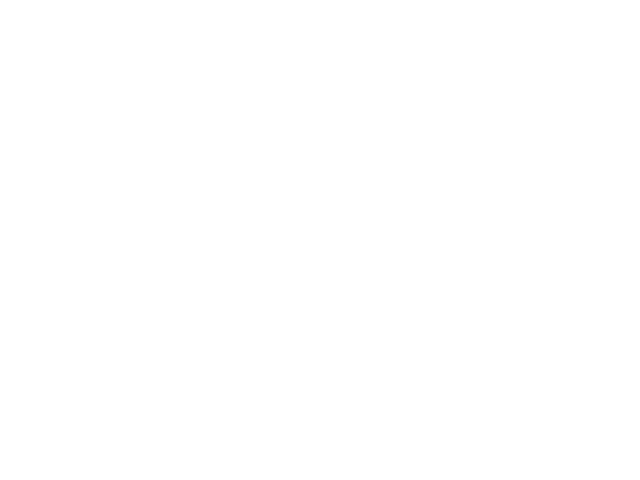

<IPython.core.display.Javascript object>


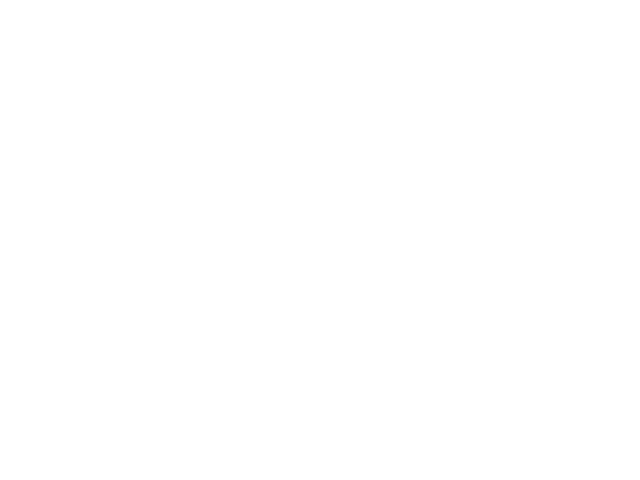

<IPython.core.display.Javascript object>


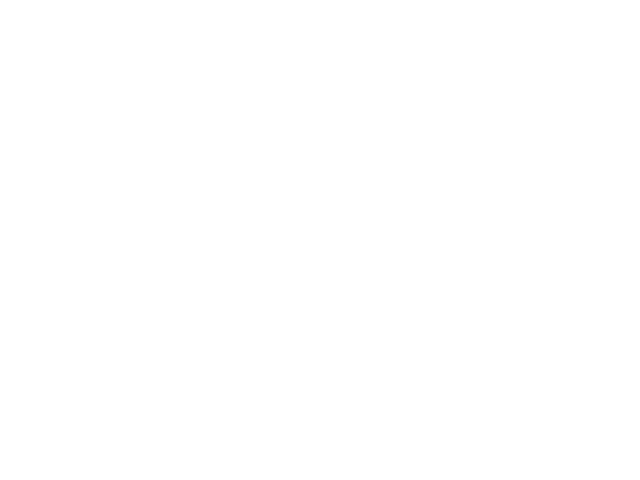

(0, 10000000.0)

In [13]:
%matplotlib notebook
#azimuthal (multiple scattering) scans
#losing alignment. check with 004 allowed.

psi_l1_scans = range(823507, 823640+1, 12)
psi_l2_scans = range(823511, 823640+1, 12)
psi_l3_scans = range(823515, 823640+1, 12)

figure()
for scan in psi_l3_scans:
    n = pdnx(p % scan)
    plot(n.psi, n.roi1_sum)
    title('Gd L3')    
ylim([0,1e7])

figure()
for scan in psi_l2_scans:
    n = pdnx(p % scan)
    plot(n.psi, n.roi1_sum)
    title('Gd L2')    
ylim([0,1e7])

figure()
for scan in psi_l1_scans:
    n = pdnx(p % scan)
    plot(n.psi, n.roi1_sum)
    title('Gd L1')    
ylim([0,1e7])


<IPython.core.display.Javascript object>


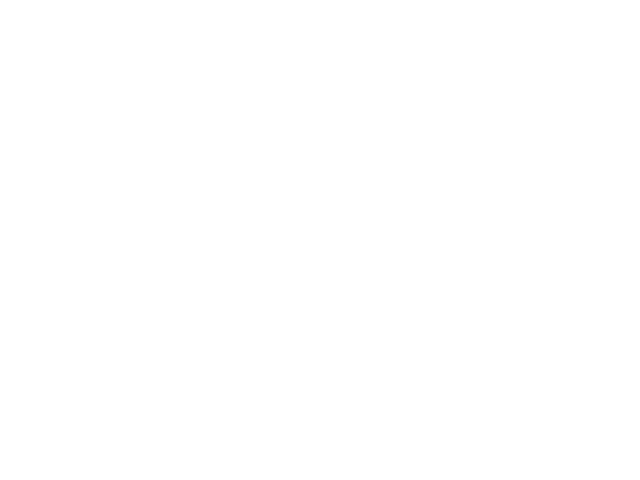

<IPython.core.display.Javascript object>


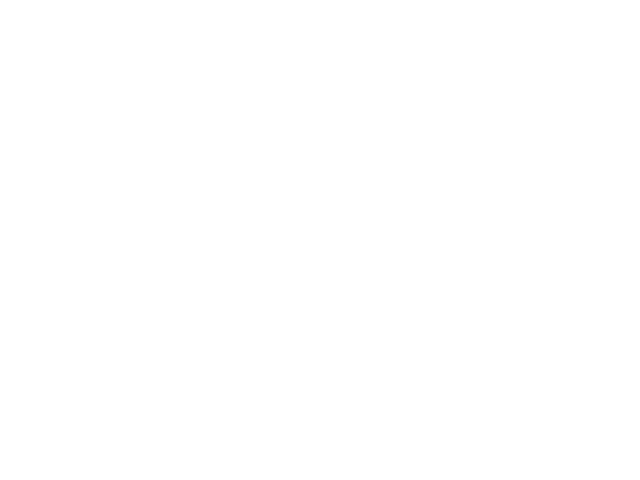

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
pdnx(p % 823680).plt('psi', 'roi1_sum', ax=ax)
pdnx(p % 823684).plt('psi', 'roi1_sum', ax=ax)

fig, ax = plt.subplots(1, 1)
pdnx(p % 823702).plt('DCMenergy', 'roi1_sum', ax = ax)
pdnx(p % 823706).plt('DCMenergy', 'roi1_sum', ax = ax)


In [15]:
showscans(range(823760, 824137+1))

command  length    scan                     start_time
0    scan eta 20.868482216249184 21.16848221624918 ...      61  823760  2020-07-15T18:03:49.912+01:00
1    scan chi 89.3526494310059 90.3526494310059 0.0...      21  823761  2020-07-15T18:05:25.579+01:00
2    scan eta 21.028482216250172 21.048482216250175...      21  823762  2020-07-15T18:06:07.769+01:00
3    scan psi 39.75 40.25 0.05 hkl [0.0017648396595...      11  823763  2020-07-15T18:06:44.659+01:00
4    scan eta 21.031124807320648 21.05112480732065 ...      21  823764  2020-07-15T18:07:04.021+01:00
5    scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823765  2020-07-15T18:07:40.348+01:00
6    scan eta 22.121580609807573 22.42158060980757 ...      61  823766  2020-07-15T18:17:40.105+01:00
7    scan chi 89.35259053333019 90.35259053333019 0...      21  823767    2020-07-15T18:19:16.1+01:00
8    scan eta 22.281580609808575 22.30158060980858 ...      21  823768  2020-07-15T18:20:26.283+01:00
9    scan psi 39.5 40.0 0.05 hkl [0.001529745611281...      11  823769  2020-07-15T18:21:03.973+01:00
10   scan eta 22.28122349393635 22.30122349393635 0...      21  823770  2020-07-15T18:21:24.334+01:00
11   scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823771  2020-07-15T18:22:01.604+01:00
12   scan eta 24.37583030681818 24.675830306818177 ...      61  823772  2020-07-15T18:32:19.161+01:00
13   scan chi 89.3526494310059 90.3526494310059 0.0...      21  823773  2020-07-15T18:33:51.143+01:00
14   scan eta 24.535830306819182 24.555830306819185...      21  823774   2020-07-15T18:34:33.33+01:00
15   scan psi 39.74999999999997 40.24999999999997 0...      11  823775  2020-07-15T18:35:09.578+01:00
16   scan eta 24.533472947672134 24.553472947672137...      21  823776  2020-07-15T18:35:29.178+01:00
17   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823777  2020-07-15T18:36:06.016+01:00
18   scan eta 20.871051739000443 21.17105173900044 ...      61  823778  2020-07-15T18:45:56.698+01:00
19   scan chi 89.35291306317944 90.35291306317944 0...      21  823779  2020-07-15T18:47:30.832+01:00
20   scan eta 21.031051739000436 21.05105173900044 ...      21  823780  2020-07-15T18:48:13.014+01:00
21   scan psi 40.75 41.25 0.05 hkl [0.0017387260106...      11  823781  2020-07-15T18:48:49.695+01:00
22   scan eta 21.033693155256902 21.053693155256905...      21  823782  2020-07-15T18:49:09.679+01:00
23   scan energy 8.350000000000001 8.41 5.0E-4 hkl ...     121  823783  2020-07-15T18:49:46.548+01:00
24   scan eta 22.124279671438032 22.42427967143803 ...      61  823784  2020-07-15T18:59:52.279+01:00
25   scan chi 89.35285674964219 90.35285674964219 0...      21  823785  2020-07-15T19:01:54.534+01:00
26   scan eta 22.27927967143803 22.299279671438033 ...      21  823786  2020-07-15T19:02:36.899+01:00
27   scan psi 40.55 41.05 0.05 hkl [0.0011890850392...      11  823787  2020-07-15T19:03:13.673+01:00
28   scan eta 22.279921407855685 22.299921407855688...      21  823788  2020-07-15T19:03:33.898+01:00
29   scan energy 7.8999999999999995 7.96 5.0E-4 hkl...     121  823789  2020-07-15T19:04:11.435+01:00
30   scan eta 24.37775788637252 24.677757886372518 ...      61  823790  2020-07-15T19:14:30.771+01:00
31   scan chi 89.35284295137166 90.35284295137166 0...      21  823791   2020-07-15T19:16:04.92+01:00
32   scan eta 24.53275788637252 24.55275788637252 0...      21  823792  2020-07-15T19:16:47.244+01:00
33   scan psi 40.499999999999986 40.999999999999986...      11  823793  2020-07-15T19:17:23.292+01:00
34   scan eta 24.533399684219813 24.553399684219816...      21  823794  2020-07-15T19:17:42.139+01:00
35   scan energy 7.21 7.2700000000000005 5.0E-4 hkl...     121  823795  2020-07-15T19:18:18.609+01:00
36   scan eta 20.873616269320436 21.173616269320434...      61  823796  2020-07-15T19:27:59.625+01:00
37   scan chi 89.35322149955316 90.35322149955316 0...      21  823797  2020-07-15T19:29:30.252+01:00
38   scan eta 21.023616269320424 21.043616269320427...      21  82379

<IPython.core.display.Javascript object>


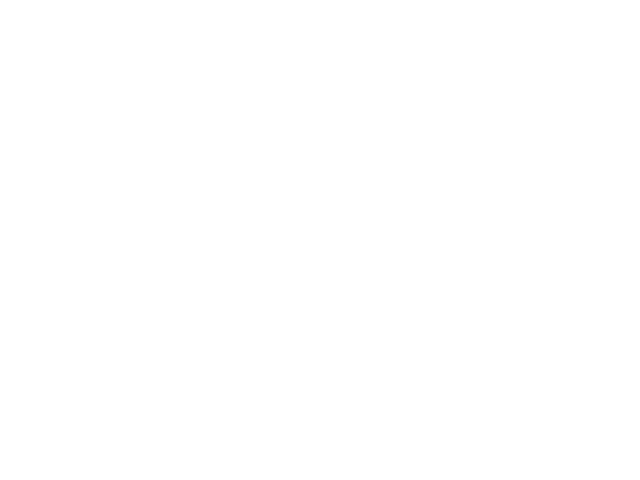

<IPython.core.display.Javascript object>


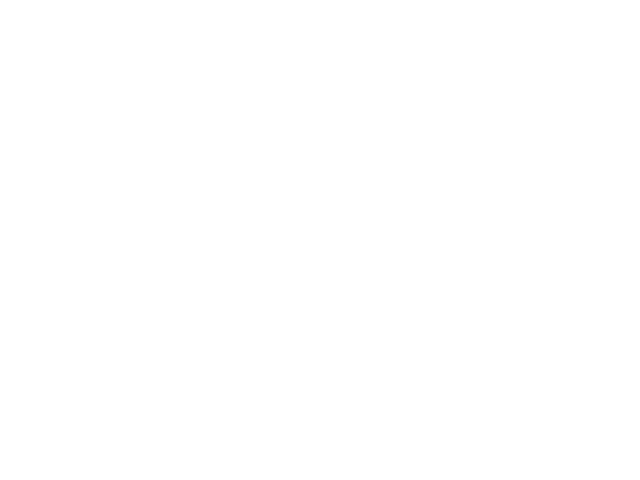

<IPython.core.display.Javascript object>


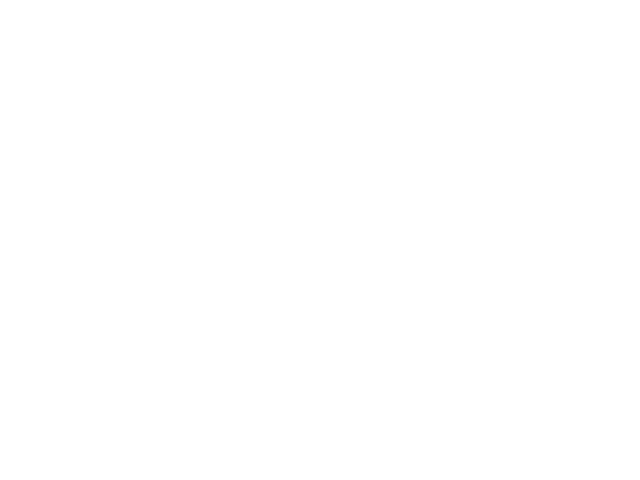

<IPython.core.display.Javascript object>


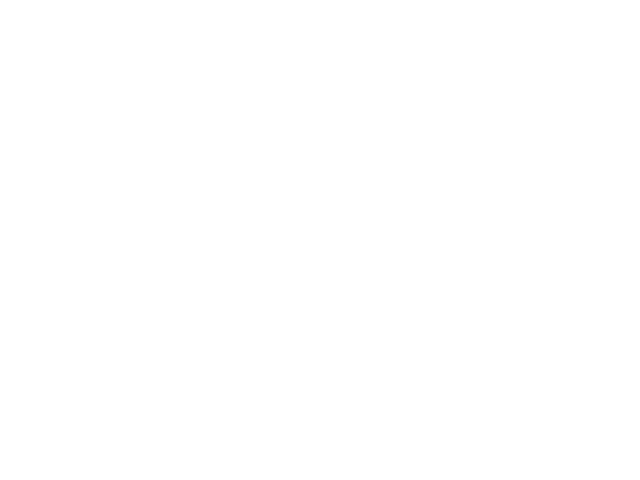

<IPython.core.display.Javascript object>


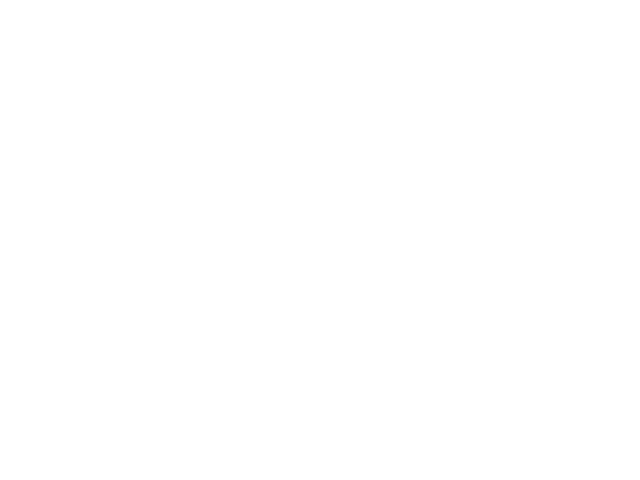

<IPython.core.display.Javascript object>


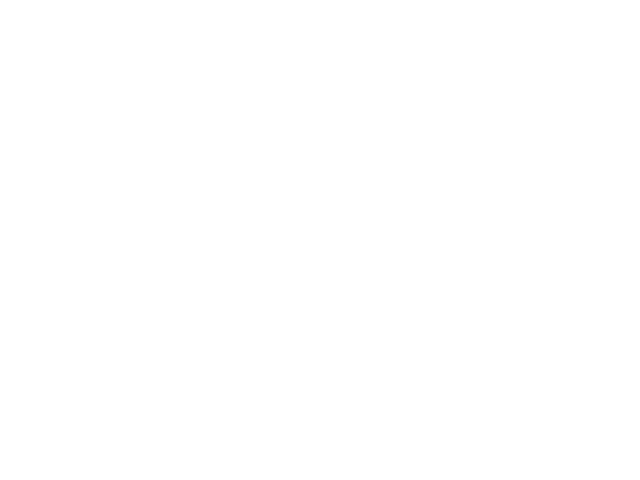

In [16]:
#energy scans with different psi values (script above)
#lots of multiple scattering

first = 823760
last = 824137
psi_l1_scans = range(823763, last+1, 18)
psi_l2_scans = range(823769, last+1, 18)
psi_l3_scans = range(823775, last+1, 18)
en_l1_scans = range(823765, last+1, 18)
en_l2_scans = range(823771, last+1, 18)
en_l3_scans = range(823777, last+1, 18)

fig, ax = plt.subplots(1, 1)
for scan in en_l1_scans:
    pdnx(p % scan).plt('DCMenergy', 'roi1_sum', ax=ax)

fig, ax = plt.subplots(1, 1)
for scan in en_l2_scans:
    pdnx(p % scan).plt('DCMenergy', 'roi1_sum', ax=ax)
    
fig, ax = plt.subplots(1, 1)
for scan in en_l3_scans:
    pdnx(p % scan).plt('DCMenergy', 'roi1_sum', ax=ax)

#ylim([0,1e7])


fig, ax = plt.subplots(1, 1)
for scan in psi_l1_scans:
    pdnx(p % scan).plt('psi', 'roi1_sum', ax=ax)

fig, ax = plt.subplots(1, 1)
for scan in psi_l2_scans:
    pdnx(p % scan).plt('psi', 'roi1_sum', ax=ax)
    
fig, ax = plt.subplots(1, 1)
for scan in psi_l3_scans:
    pdnx(p % scan).plt('psi', 'roi1_sum', ax=ax)

#ylim([0,1e7])


In [17]:
showscans(range(824165, 825283+1), metadata = ['entry1/sample/beam/incident_energy','entry1/before_scan/psi/psi'])

command     incident_energy  length                 psi    scan                     start_time
0     scan idgap 6.36085 6.400849999999999 0.002 Bea...    7.24399716251239      21   61.74999999999992  824165  2020-07-16T10:48:38.614+01:00
1     scan eta 24.374194904580946 24.674194904580943...    7.24399716251239      61   45.00022433636228  824166  2020-07-16T10:49:14.018+01:00
2     scan chi 89.35441462626818 90.35441462626818 0...   7.244001619177332      21   44.99880169434683  824167  2020-07-16T10:50:47.797+01:00
3     scan eta 24.60781523218753 24.64781523218753 0...   7.213997701085241      41   44.99971759756888  824168  2020-07-16T10:51:35.317+01:00
4     scan eta 24.607982027288354 24.647982027288354...  7.2139999102576216      41   45.09977063661253  824169  2020-07-16T10:52:41.732+01:00
5     scan eta 24.608148756052127 24.648148756052127...  7.2139999102576216      41  45.199840174567896  824170  2020-07-16T10:53:48.153+01:00
6     scan eta 24.60831541797369 24.648315417973688 ...   7.213997701085241      41   45.29988954247223  824171  2020-07-16T10:54:54.982+01:00
7     scan eta 24.60848201254362 24.64848201254362 0...  7.2139999102576216      41   45.39992768874273  824172  2020-07-16T10:56:01.883+01:00
8     scan eta 24.6086485392557 24.6486485392557 0.0...   7.213997701085241      41   45.50000294120815  824173   2020-07-16T10:57:09.18+01:00
9     scan eta 24.608814997602064 24.648814997602063...  7.2139999102576216      41   45.60006697870829  824174  2020-07-16T10:58:15.667+01:00
10    scan eta 24.608981387075684 24.648981387075683...   7.214004328606605      41   45.70010879392465  824175  2020-07-16T10:59:22.144+01:00
11    scan eta 24.609147707168244 24.649147707168243...   7.213997701085241      41   45.80019137883633  824176  2020-07-16T11:00:29.403+01:00
12    scan eta 24.609313957376255 24.649313957376254...  7.2139999102576216      41    45.9002313620879  824177   2020-07-16T11:01:36.48+01:00
13    scan eta 24.609480137189987 24.649480137189986...    7.21400211943141      41  46.000310298411186  824178  2020-07-16T11:02:44.051+01:00
14    scan eta 24.609646246106134 24.649646246106133...   7.213997701085241      41   46.10037616094961  824179  2020-07-16T11:03:51.242+01:00
15    scan eta 24.60981228361651 24.64981228361651 0...   7.213997701085241      41   46.20043836657759  824180  2020-07-16T11:04:59.581+01:00
16    scan eta 24.60997824921613 24.64997824921613 0...  7.2139999102576216      41  46.299480173429316  824181  2020-07-16T11:06:08.268+01:00
17    scan eta 24.61014414239921 24.65014414239921 0...  7.2139999102576216      41    46.3995442120889  824182   2020-07-16T11:07:17.85+01:00
18    scan eta 24.610309962661372 24.65030996266137 ...    7.21400211943141      41  46.499610061969534  824183  2020-07-16T11:08:28.225+01:00
19    scan eta 24.61047570949572 24.65047570949572 0...   7.213995491914268      41  46.599659669687384  824184  2020-07-16T11:09:38.501+01:00
20    scan eta 24.610641382398764 24.650641382398764...   7.213997701085241      41  46.699738163350496  824185  2020-07-16T11:10:49.812+01:00
21    scan eta 24.610806980866176 24.650806980866175...   7.214006537783209      41    46.7998040343747  824186  2020-07-16T11:12:00.497+01:00
22    scan eta 24.610972504392304 24.650972504392303...   7.213997701085241      41   46.89989213788191  824187  2020-07-16T11:13:12.148+01:00
23    scan eta 24.61113795247277 24.65113795247277 0...  7.2139999102576216      41   46.99993577924651  824188  2020-07-16T11:14:21.839+01:00
24    scan eta 24.611303324604744 24.651303324604743...   7.213997701085241      41   47.10000348580885  824189  2020-07-16T11:15:32.324+01:00
25    scan eta 24.61146862028537 24.651468620285367 ...   7.214004328606605      41  47.200071196307526  824190  2020-07-16T11:16:44.122+01:00
26    scan eta 24.61163383900715 24.65163383900715 0...   7.213997701085241      41   47.30013890584552  824191  2020-07-16T11:17:55.254+01:00
27    scan eta 24.61179898027203 24.65179898

<IPython.core.display.Javascript object>


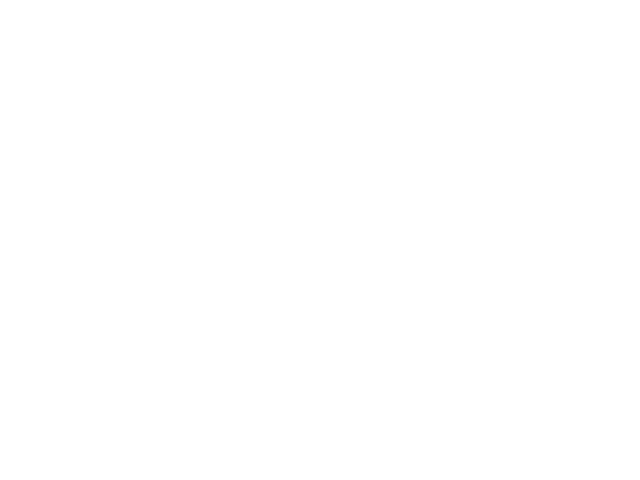

<IPython.core.display.Javascript object>


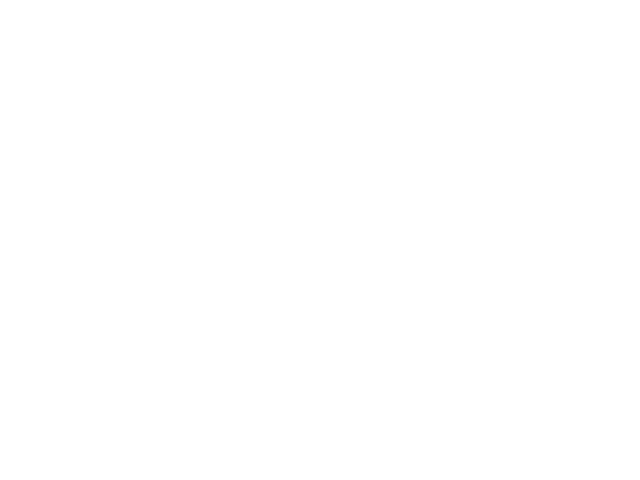

<IPython.core.display.Javascript object>


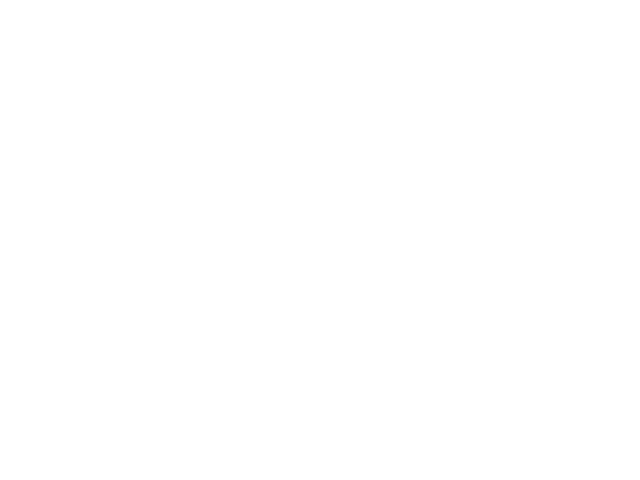

<IPython.core.display.Javascript object>


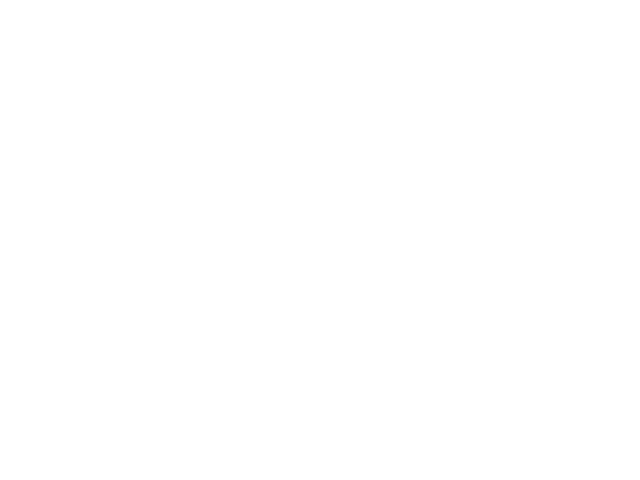

<IPython.core.display.Javascript object>


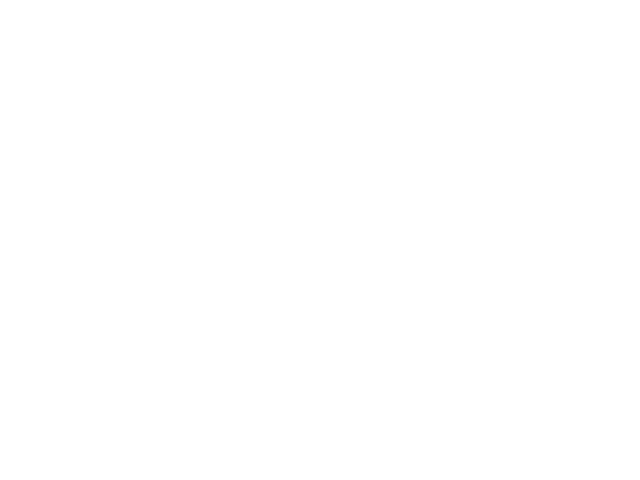

In [18]:
# get smallest area for each energy
max_width = 0.01 # ignore wide peaks
res = {}
for scan in range(824168, 825675+1):
    n = pdnx(p % scan)
    if len(n.beamOK) == 41: #it's a fine eta scan
        
        en = round(float(n.nx['entry1/sample/beam/incident_energy']), 3)
        psi = n.nx['entry1/before_scan/psi/psi']
        
        [centre, fwhm_sd, fwhm_area, xsum, height, area, m, c] = peak(n.eta, n.roi1_sum-n.scroi_bg_sum, 3)
        #print(en, centre-np.mean(n.eta), np.max(n.eta)-np.min(n.eta), fwhm_sd, area, float(psi))
        
        if not np.isnan(fwhm_sd) and fwhm_sd < max_width:
        
            if en in res.keys():

                if area < res[en]['area']:   
                    res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
            else:

                res[en] = {'area': area, 'fwhm_sd': fwhm_sd, 'fwhm_area': fwhm_area, 'centre': centre, 'psi': float(psi)}
        
        #plot(n.eta, n.roi1_sum-n.scroi_bg_sum)

en, cts, psi , centre, fwhm_sd, fwhm_area = [], [], [], [], [], []
for pt in res:
    en += [pt]
    cts += [res[pt]['area']]
    psi += [res[pt]['psi']]
    fwhm_sd += [res[pt]['fwhm_sd']]
    fwhm_area += [res[pt]['fwhm_area']]
    centre += [res[pt]['centre']]
    
    
en, cts, psi, fwhm_sd, centre, fwhm_area = np.array(en), np.array(cts), np.array(psi), np.array(fwhm_sd), np.array(centre), np.array(fwhm_area)

figure(); plot(en, cts, '-o'); title('area'); grid(1)
figure(); plot(en, psi, '-o'); title('psi'); grid(1)
figure(); plot(en, fwhm_sd, '-o'); title('fwhm_sd'); grid(1)
figure(); plot(en, fwhm_area, '-o'); title('fwhm_area'); grid(1)
figure(); plot(en, centre, '-o'); title('centre'); grid(1)


<IPython.core.display.Javascript object>


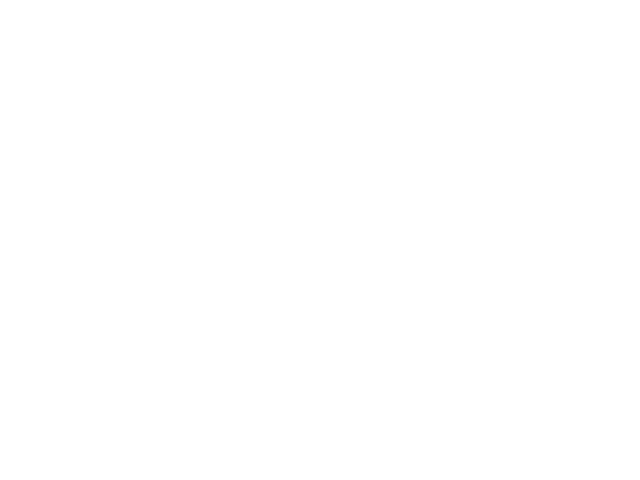

<IPython.core.display.Javascript object>


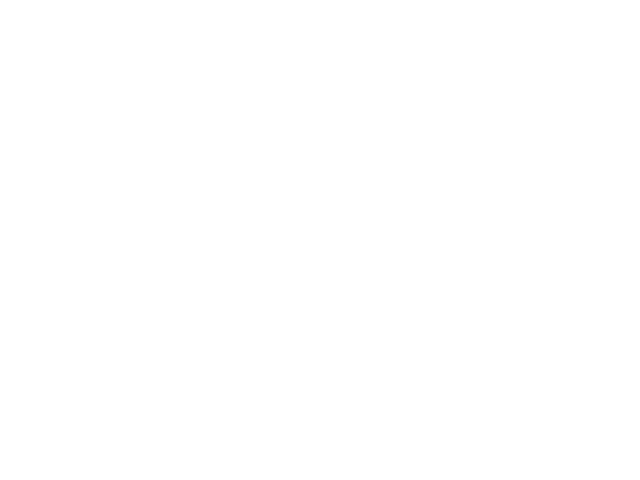

<IPython.core.display.Javascript object>


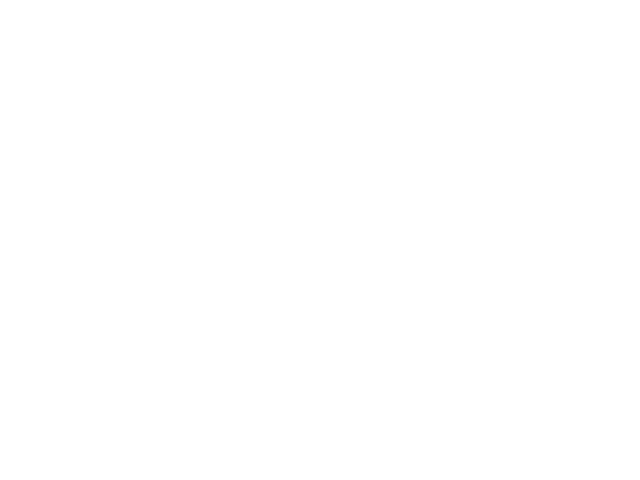

<IPython.core.display.Javascript object>


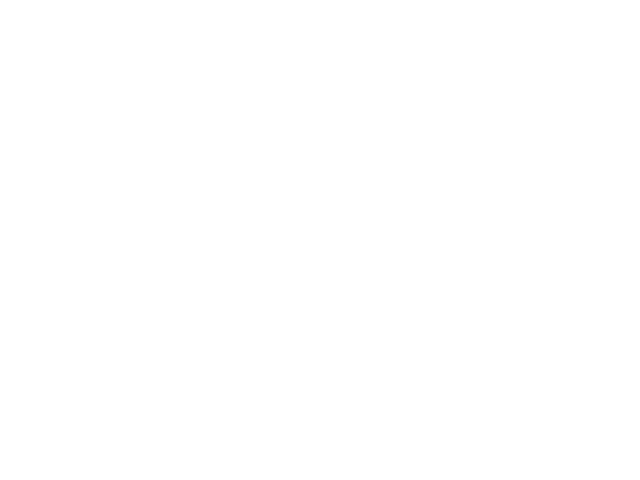

<IPython.core.display.Javascript object>


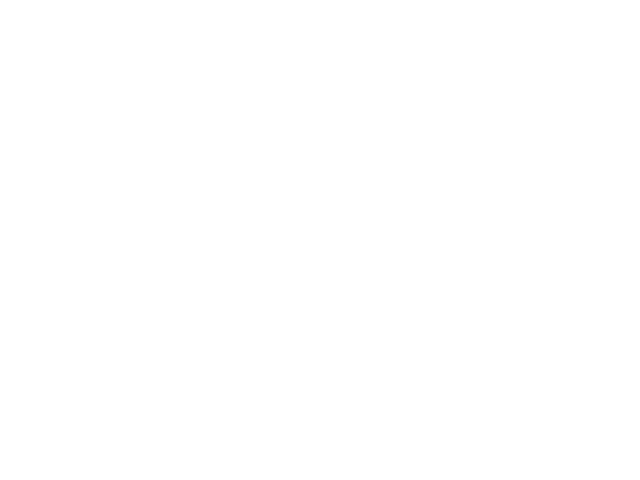

<IPython.core.display.Javascript object>


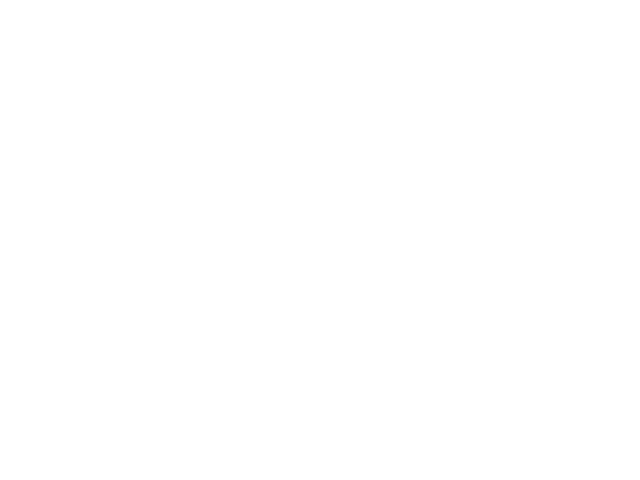

<IPython.core.display.Javascript object>


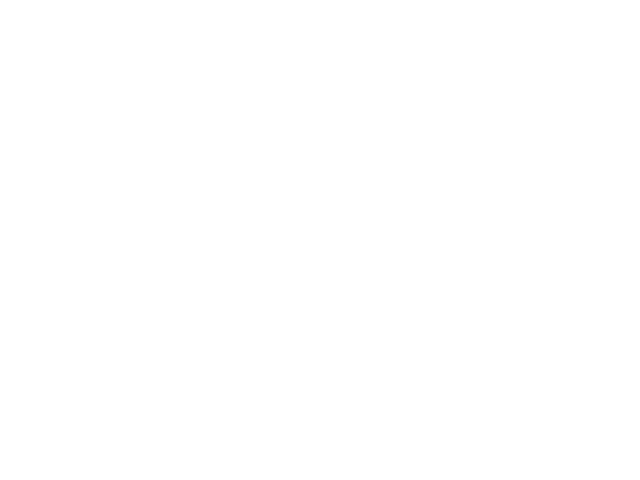

<IPython.core.display.Javascript object>


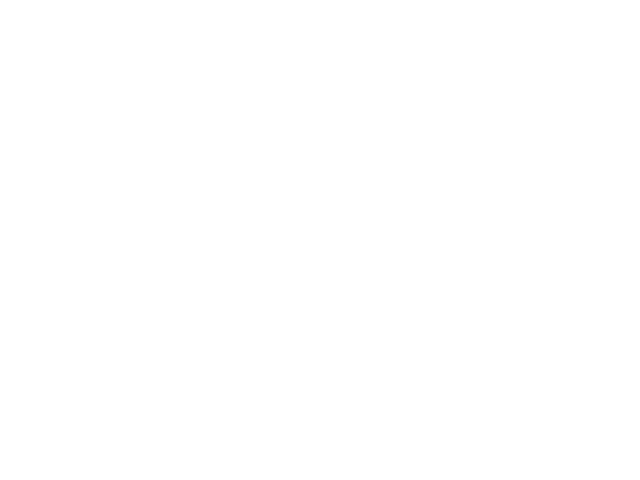

<IPython.core.display.Javascript object>


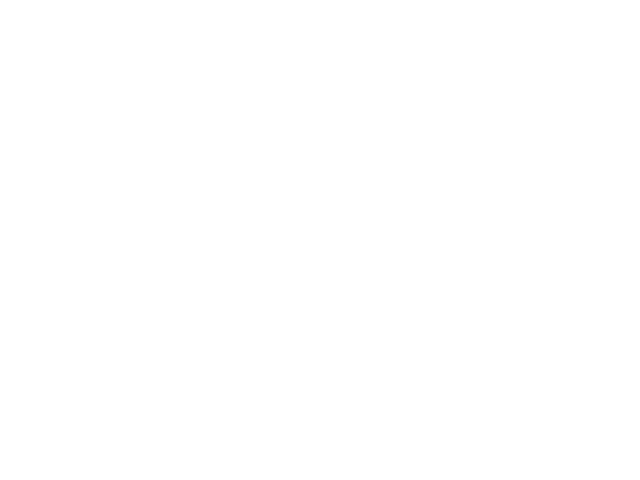

<IPython.core.display.Javascript object>


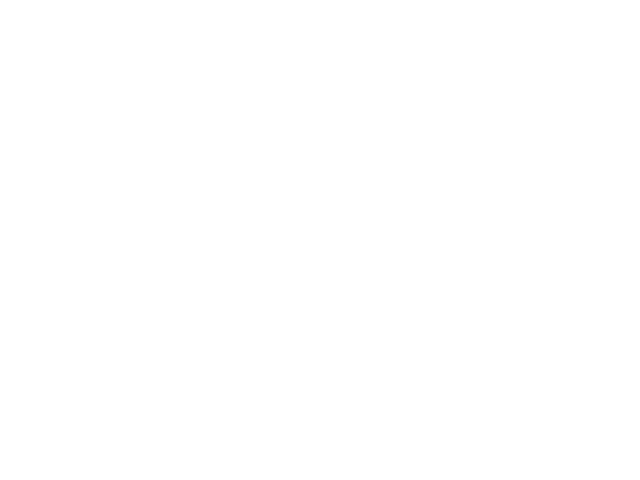

<IPython.core.display.Javascript object>


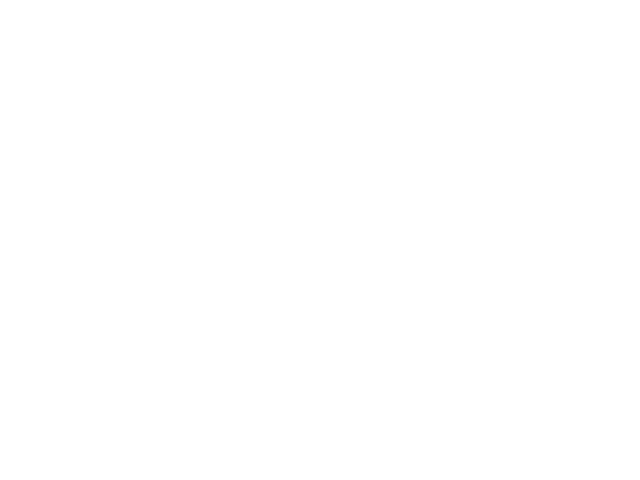

<IPython.core.display.Javascript object>


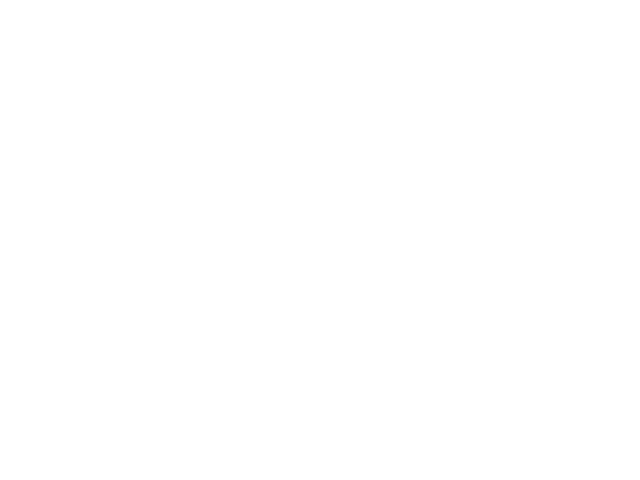

<IPython.core.display.Javascript object>


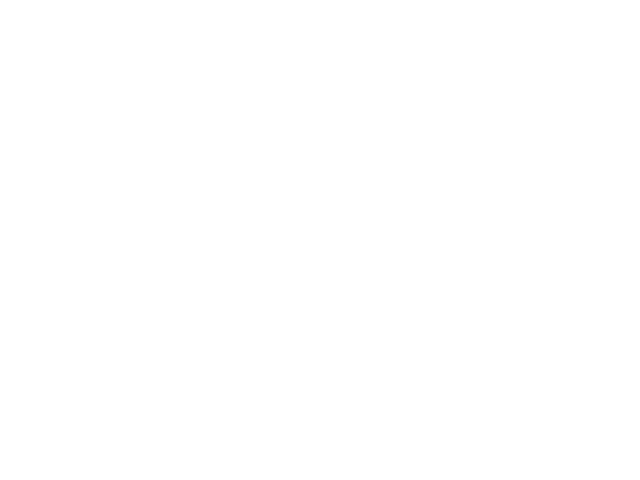

<IPython.core.display.Javascript object>


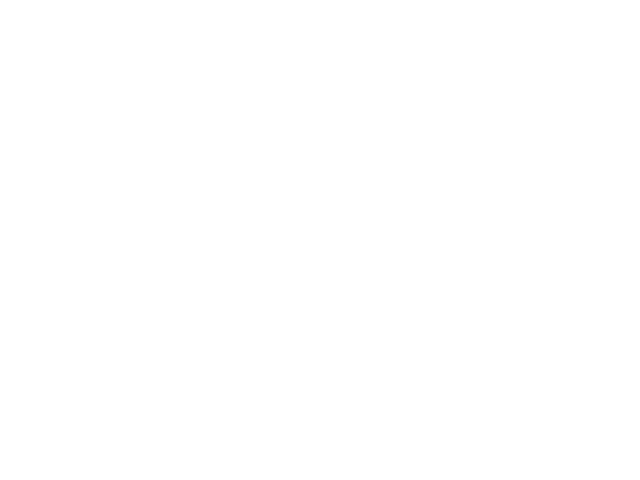

<IPython.core.display.Javascript object>


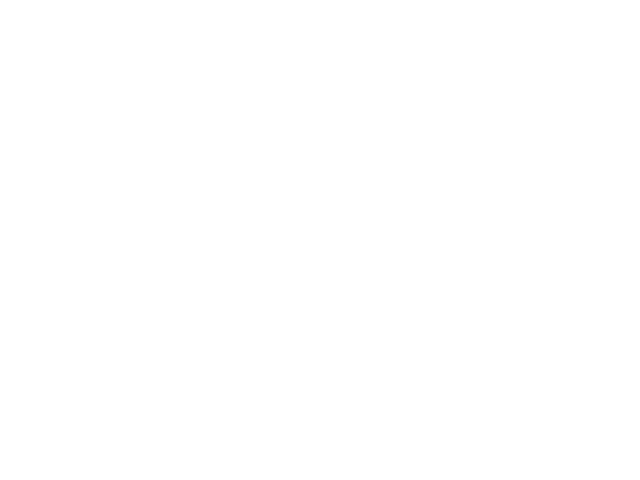

<IPython.core.display.Javascript object>


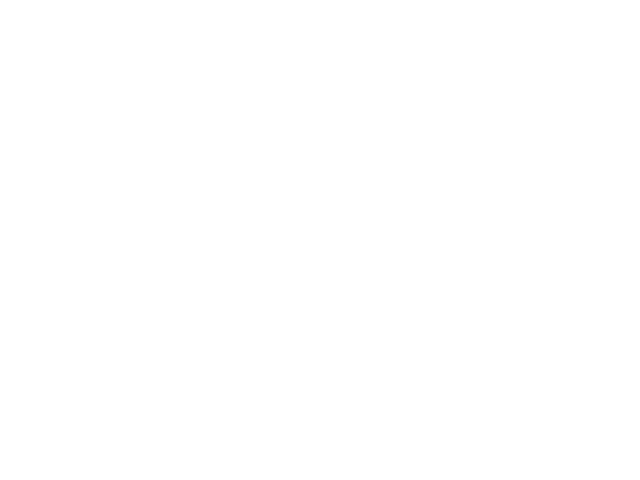

<IPython.core.display.Javascript object>


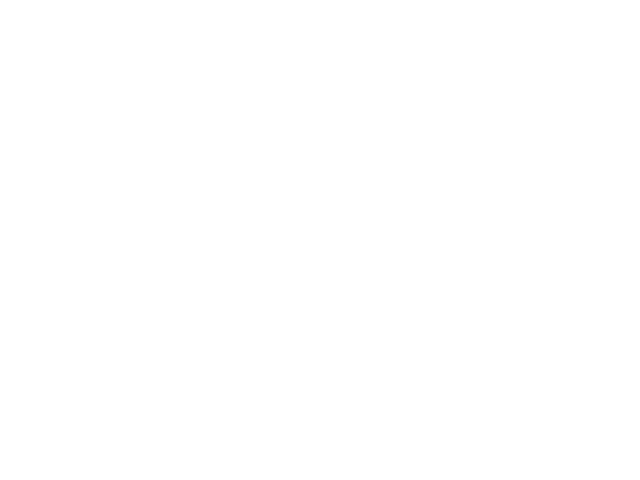

<IPython.core.display.Javascript object>


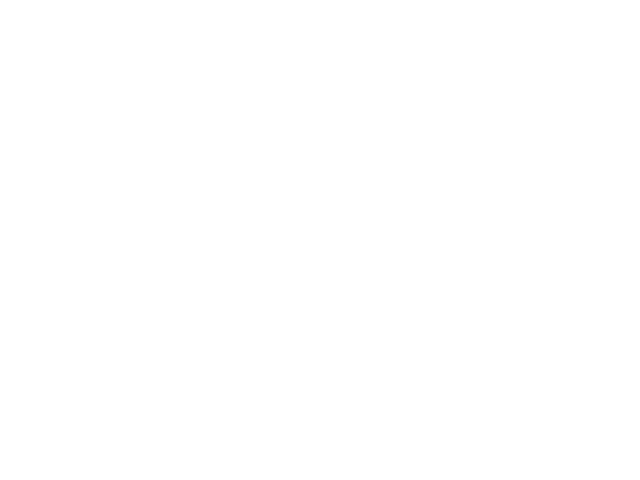

<IPython.core.display.Javascript object>


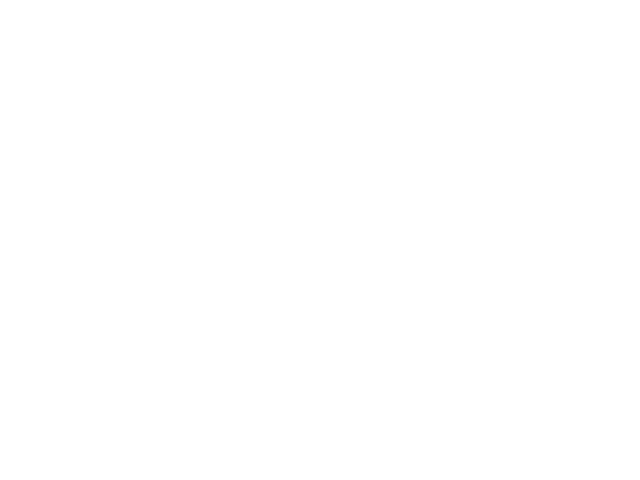

<IPython.core.display.Javascript object>


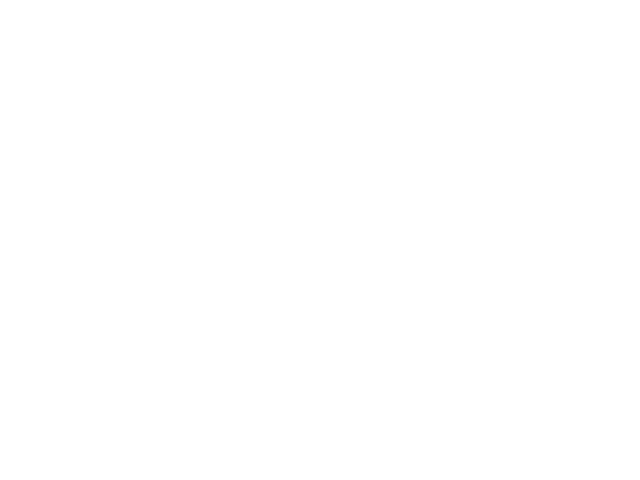

<IPython.core.display.Javascript object>


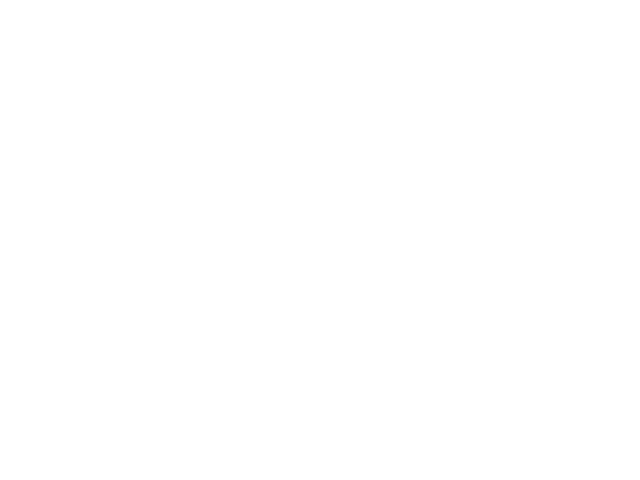

<IPython.core.display.Javascript object>


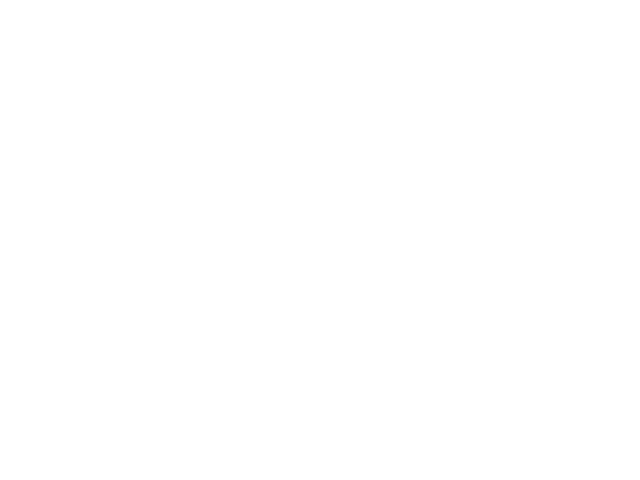

<IPython.core.display.Javascript object>


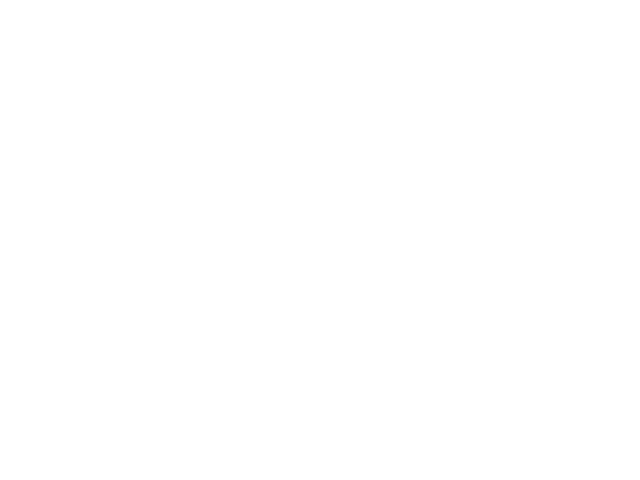

<IPython.core.display.Javascript object>


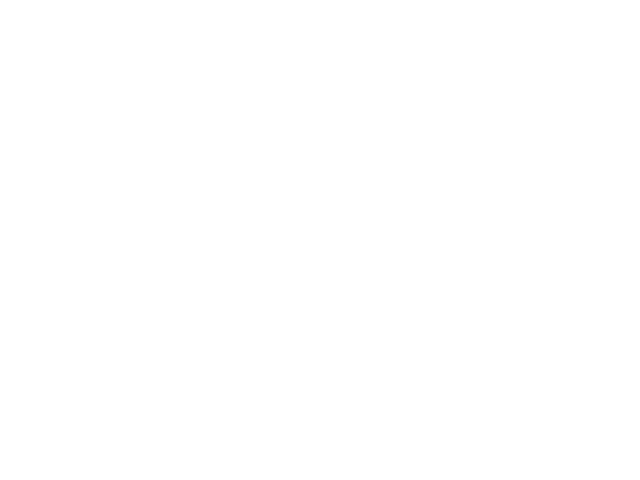

<IPython.core.display.Javascript object>


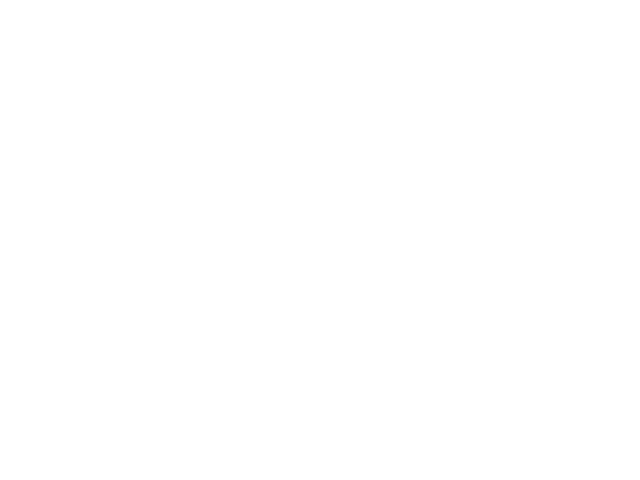

<IPython.core.display.Javascript object>


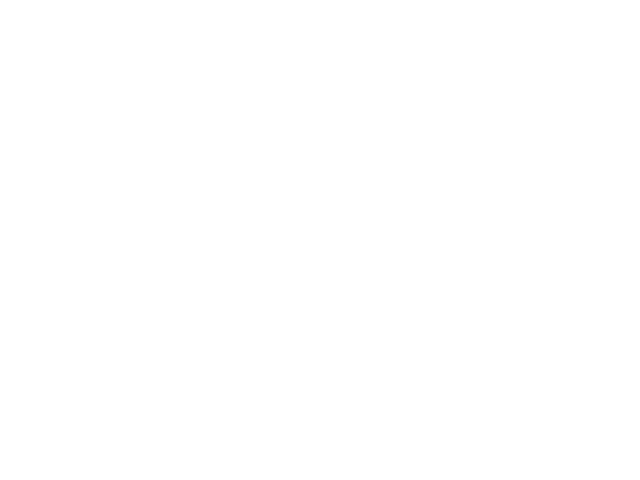

<IPython.core.display.Javascript object>


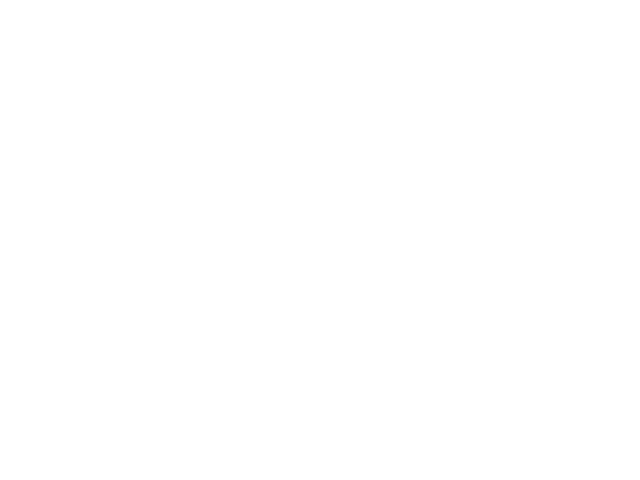

<IPython.core.display.Javascript object>


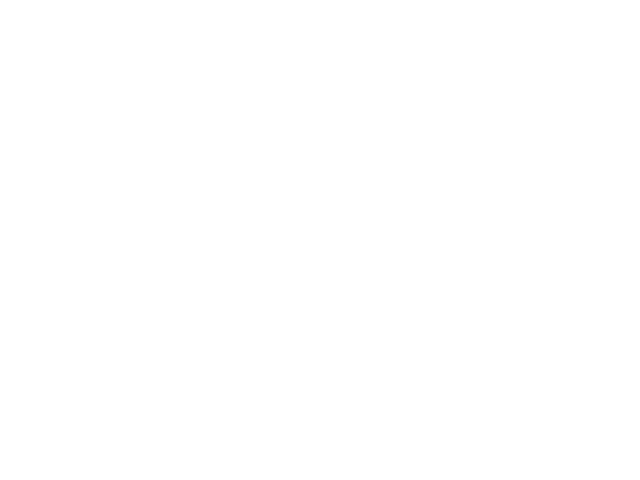

<IPython.core.display.Javascript object>


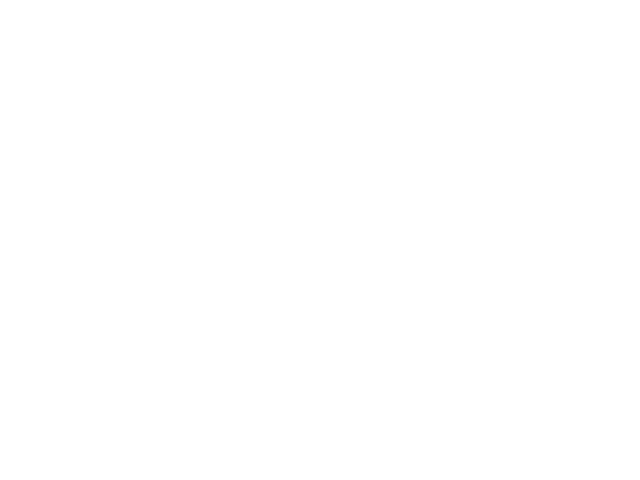

<IPython.core.display.Javascript object>


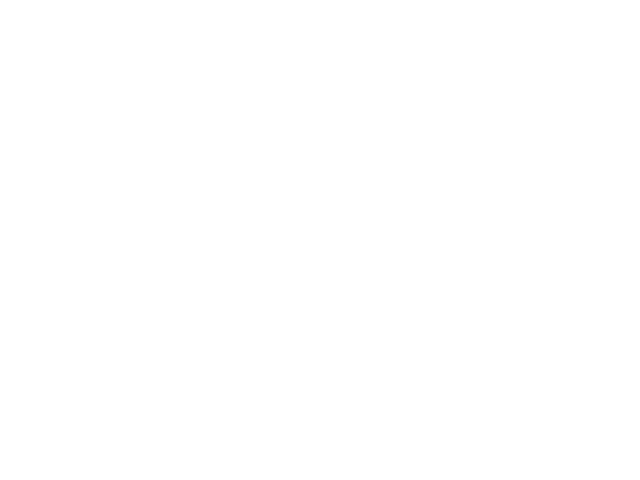

<IPython.core.display.Javascript object>


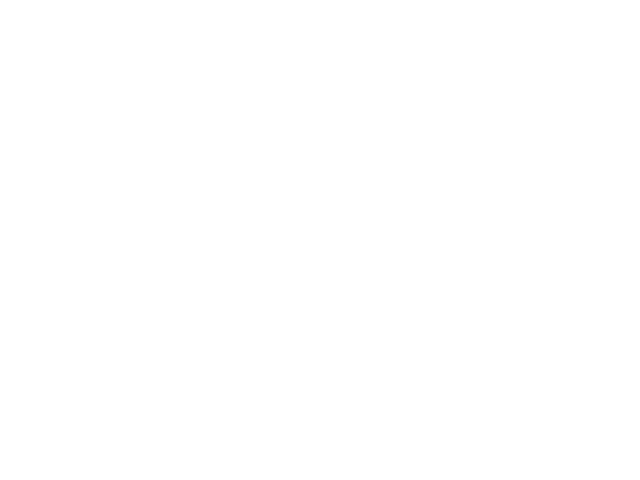

<IPython.core.display.Javascript object>


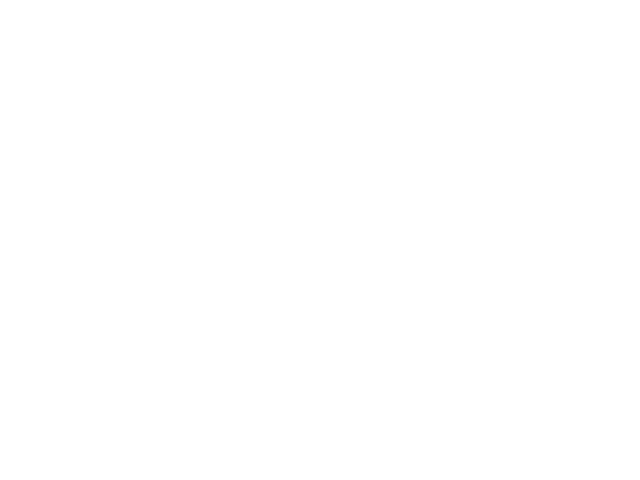

<IPython.core.display.Javascript object>


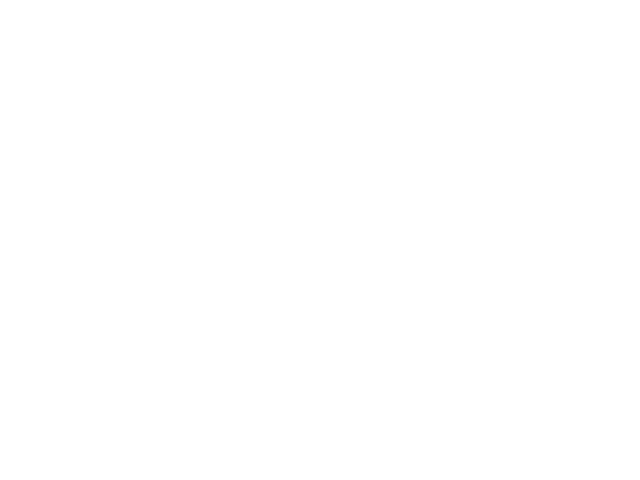

<IPython.core.display.Javascript object>


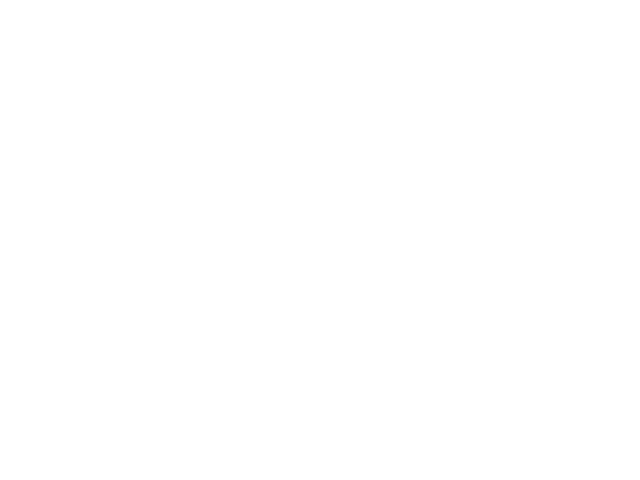

<IPython.core.display.Javascript object>


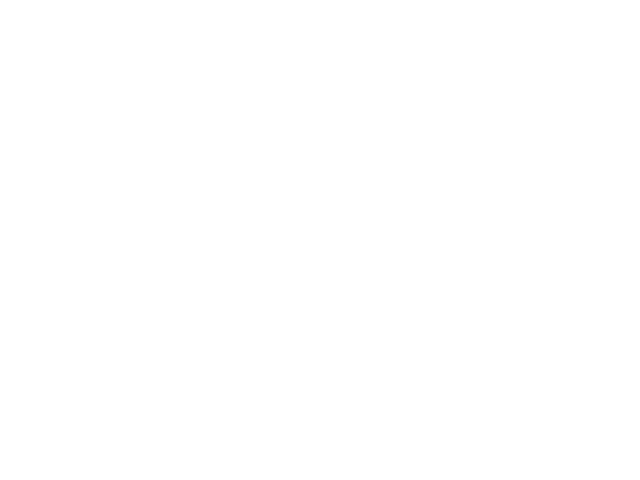

<IPython.core.display.Javascript object>


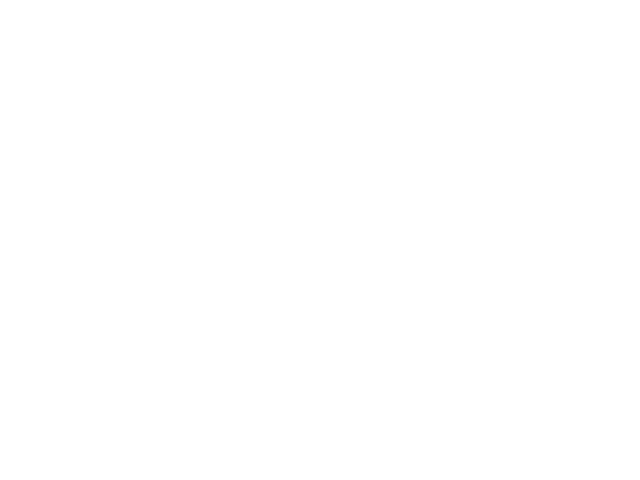

<IPython.core.display.Javascript object>


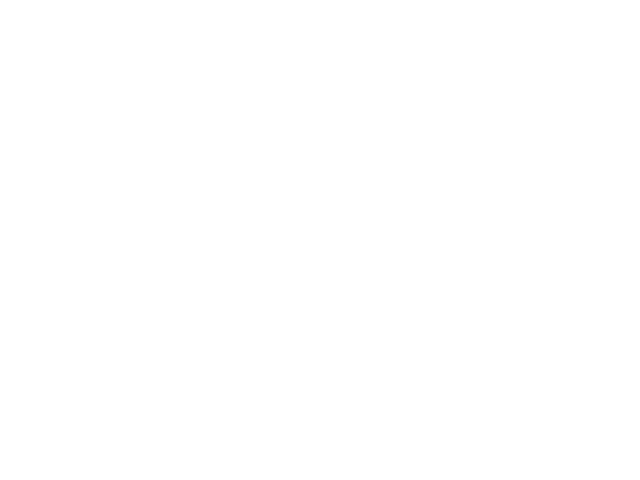

<IPython.core.display.Javascript object>


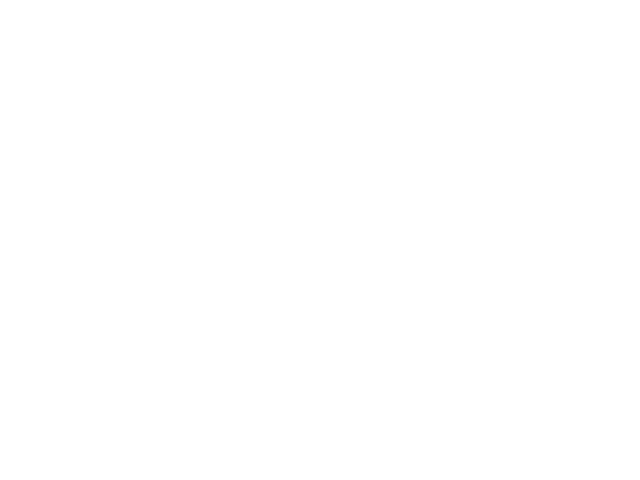

<IPython.core.display.Javascript object>


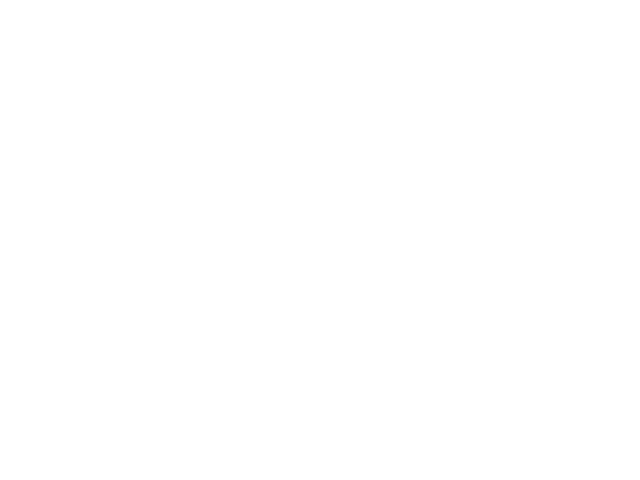

<IPython.core.display.Javascript object>


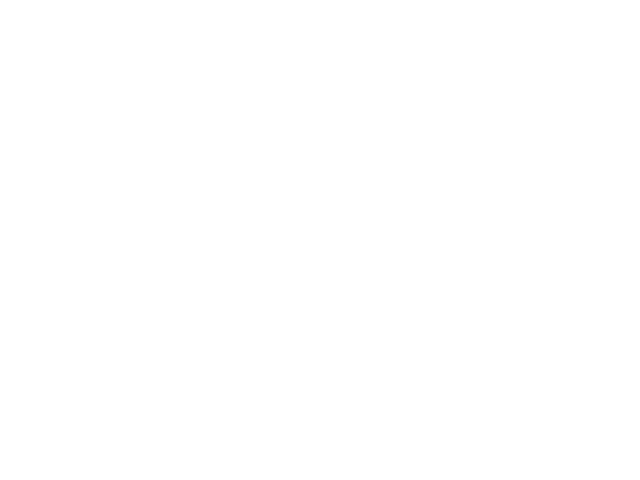

<IPython.core.display.Javascript object>


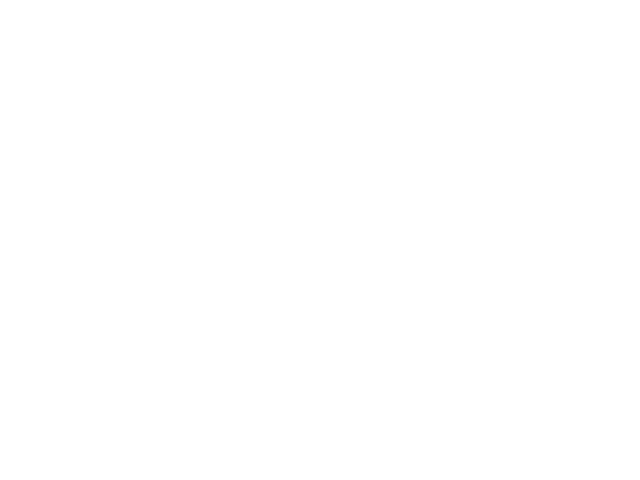

<IPython.core.display.Javascript object>


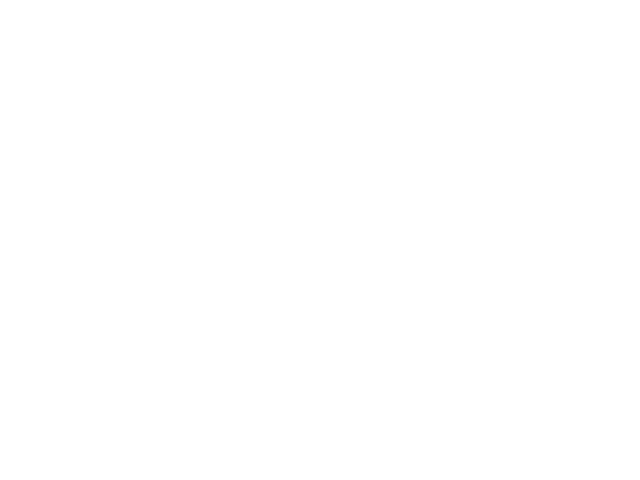

<IPython.core.display.Javascript object>


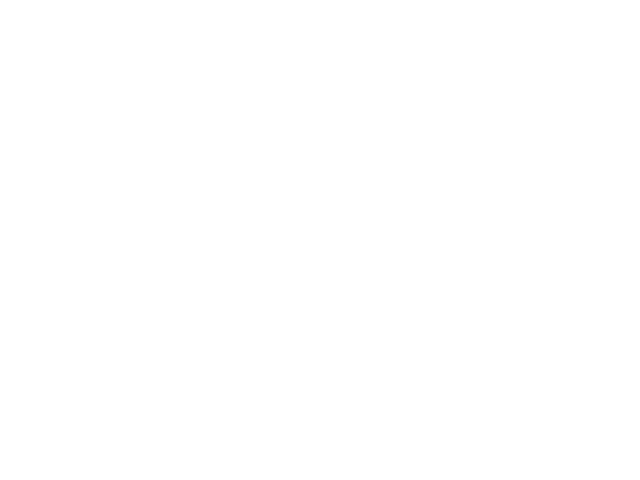

<IPython.core.display.Javascript object>


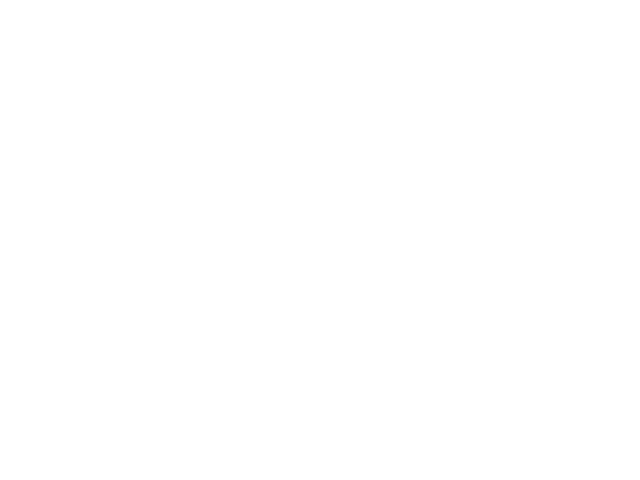

<IPython.core.display.Javascript object>


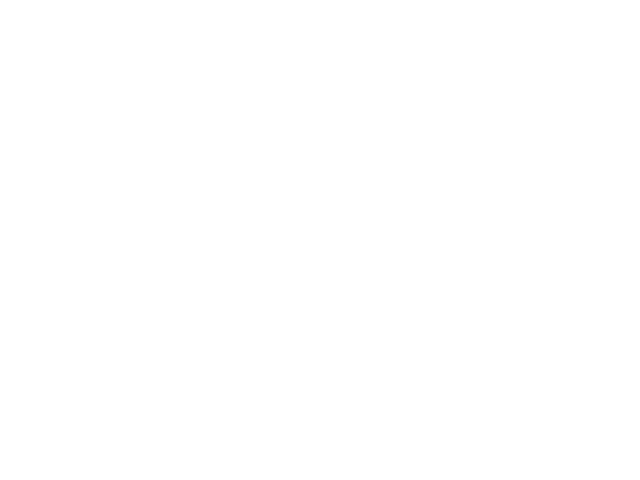

<IPython.core.display.Javascript object>


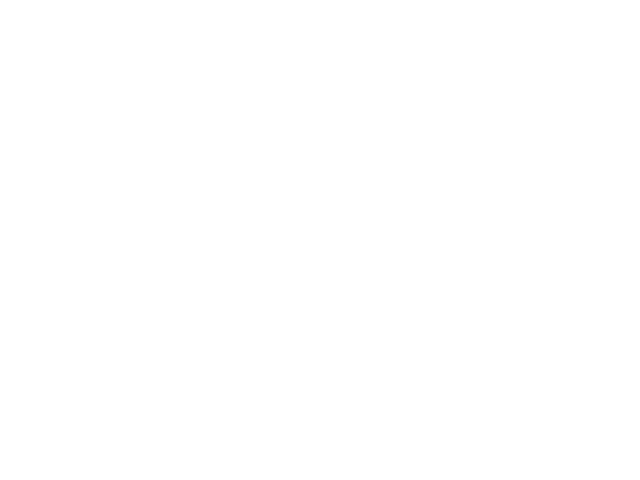

<IPython.core.display.Javascript object>


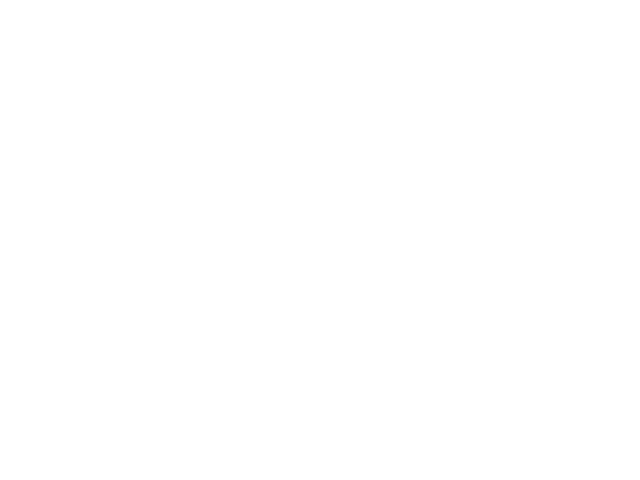

<IPython.core.display.Javascript object>


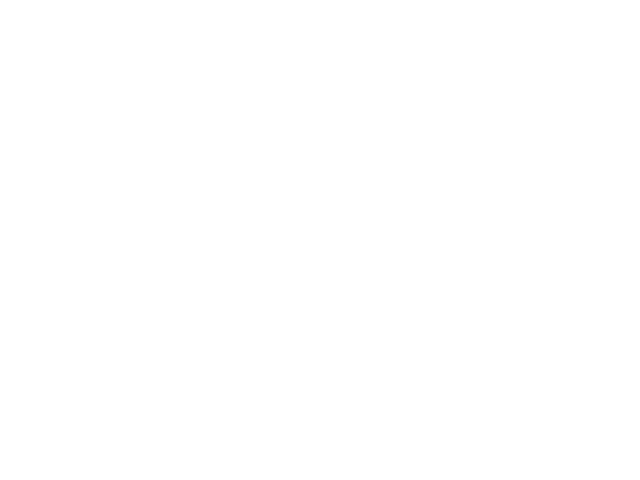

<IPython.core.display.Javascript object>


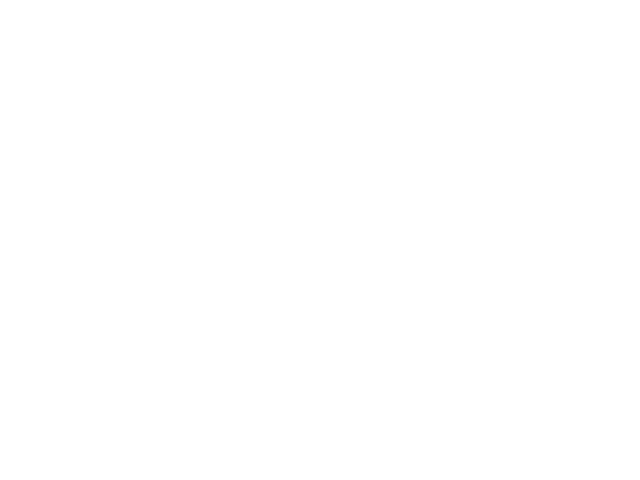

In [19]:
# look at all eta scans for each energy

#figure()
en = 0
for scan in range(824168, 825675+1):
#for scan in range(824168, 824200+1):
#for scan in range(824168, 824170+1):

    enold = en
    n = pdnx(p % scan)
    en = round(float(n.nx['entry1/sample/beam/incident_energy']), 3)
    
    if enold - en != 0: #new figure for new energy
        figure()
        
    psi = n.nx['entry1/before_scan/psi/psi']
    n['psi'] = psi * np.ones(len(n))       
    plot((n.eta-np.mean(n.eta))*2 + psi, n.roi1_sum-n.scroi_bg_sum) #eta width doubled for clearer plot
    ylim([0, 2e6])
    title('Energy %.4g keV' % en)


        
    
        



pil3_100k:NXdata
  TimeFromEpoch -> /entry1/instrument/atimetwo/TimeFromEpoch
  TimeSec -> /entry1/instrument/atime/TimeSec
  count_time -> /entry1/instrument/pil3_100k/count_time
  data -> 807001-pilatus3_100k-files/807001.hdf['/entry/instrument/detector/data']
  delta -> /entry1/instrument/transformations/delta
  gamma -> /entry1/instrument/transformations/gamma
  ic1monitor -> /entry1/instrument/ic1monitor/ic1monitor
  kappa -> /entry1/sample/transformations/kappa
  maxval -> /entry1/instrument/pil3_100k/maxval
  maxx -> /entry1/instrument/pil3_100k/maxx
  maxy -> /entry1/instrument/pil3_100k/maxy
  mu -> /entry1/sample/transformations/mu
  offsetdelta -> /entry1/instrument/transformations/offsetdelta
  path -> /entry1/instrument/pil3_100k/path
  phi -> /entry1/sample/transformations/phi
  rc -> /entry1/instrument/rc/rc
  sum -> /entry1/instrument/pil3_100k/sum
  theta -> /entry1/sample/transformations/theta
(3, 195, 487) -66
[-22, -22, -22]


<IPython.core.display.Javascript object>


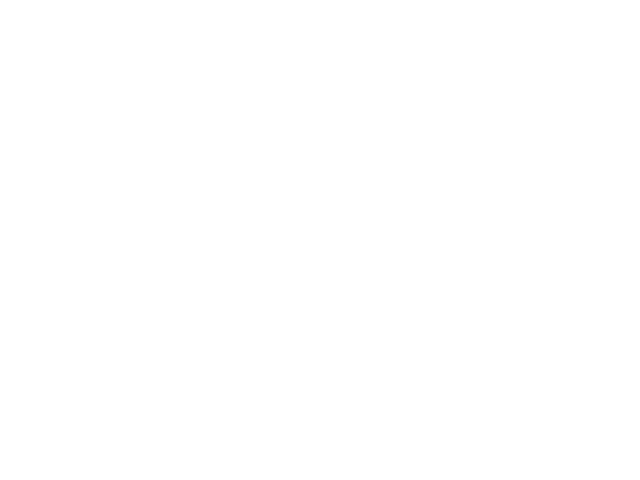

In [20]:
#schiroi = HardwareTriggerableDetectorDataProcessor('schiroi', pil3, [SumMaxPositionAndValue()])
#iw=50; jw=1; schiroi.setRoi(int(ci-iw/2.),int(cj-jw/2.),int(ci+iw/2.),int(cj+jw/2.))

#scroi_bg = HardwareTriggerableDetectorDataProcessor('scroi_bg', pil3, [SumMaxPositionAndValue()])
#iw=13; jw=15; scroi_bg.setRoi(int(ci-iw/2.),int(cj-jw/2.-16),int(ci+iw/2.),int(cj+jw/2.-16))

# test file - found data ok
p='/dls/i16/data/2020/cm26473-1/%i.nxs'
n=pdnx(p % 807001)

#recent file - no data
#p='/dls/i16/data/2020/cm26473-2/%i.nxs'
#n = pdnx(p % 824166)
#n = pdnx(p % 824168)

print(n.nx.entry1.pil3_100k.tree)

print(n.nx.entry1.pil3_100k.data.shape, sum(sum(sum(n.nx.entry1.pil3_100k.data))) )
print([sum(sum(n.nx.entry1.pil3_100k.data[i])) for i in range(n.nx.entry1.pil3_100k.data.shape[0])])
    
figure()
imshow(n.nx.entry1.pil3_100k.data[1])


In [21]:
#Official beam time 28-31 July 2020
#Mono problems and power outage - just a few hours to test cvscan script
#p='/dls/i16/data/2020/mm25913-2/%i.nxs'
p='/dls/staging/dls/i16/data/2020/mm25913-2/%i.nxs'

In [22]:
#scan timing tests
# cvscan kthZebra kth_val-.03 kth_val+0.03 .0005 kthZebraPil3 .1 ##  21 sec/scan (12.1 sec counting, o/head 9 sec)
# cvscan kthZebra kth_val-.03 kth_val+0.03 .0005 kthZebraPil3 .02 ## 12 sec (2.4 sec counting, o/head 9 sec)
# cvscan kthZebra kth_val-.03 kth_val+0.03 .0005 kthZebraPil3 .05 ## 14 sec (5 sec counting, o/head 9 sec)
# time in days
#(160 + 200) * 100 * 14. /3600/24
#~ 3 days with 0.1 deg psi instead of 0.05

# Previous scans did not move chi and phi - start again 843373

In [23]:
# Final data sets?

#for i in range(len(scan)):
#    print('%i\t%.3f' % (scan[i], en[i]))
    
#l1: 8.33 - 8.43 keV
#843463 - 854159

#l3: 7.244 - 7.294
#854160 - 862373

#l2: 7.932 - 7.932 (not complete)
#862374 - 863881

In [24]:
# function to analyse image data and extract peak info in a dictionary

print_each_n = 100

from IPython.display import display, Javascript
import sys
import pickle
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools import *
from dlstools.pdnx import *
from matplotlib.pyplot import *

from dlstools.quickfit import *
import matplotlib.pyplot as plt
from time import sleep, asctime

%matplotlib notebook

ci, cj = 242, 95
iw=50; jw=50
lcroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
iw=13; jw=15
scroi = (int(ci-iw/2.), int(cj-jw/2.), int(ci+iw/2.), int(cj+jw/2.))
scroi_bg = (int(ci-iw/2.), int(cj-jw/2.-16), int(ci+iw/2.), int(cj+jw/2.-16))


def analyse_images(scans, p):

    res_dict = {}
    res_dict['scan'], res_dict['en'], res_dict['area'], res_dict['fwhm_sd'], res_dict['fwhm_area'], res_dict['centre'], res_dict['psi'] = [], [], [], [], [], [], []

    for scan in scans:
    #figure(99) 
        n = pdnx(p % scan)

        if scan == print_each_n * np.floor(scan / print_each_n): # display file name
            print(asctime() + '\t' + p % scan)

        if len(n) == 121: #it's a fine eta scan

            res_dict['scan'] += [scan]
            res_dict['en'] += [round(float(n.nx['entry1/sample/beam/incident_energy']), 4)]
            res_dict['psi'] += [float(n.nx['entry1/before_scan/psi/psi'])]

            r =  scroi
            n['scroi_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))

            #fig = figure(99); pcolor(np.log(n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum(0)))
            #fig.canvas.draw() # update

            r =  scroi_bg
            n['scroi_bg_sum'] = n.nx.entry1.instrument.kthZebraPil3.data[:, r[1]:r[3], r[0]:r[2]].sum((1,2))   
            [centre, fwhm_sd, fwhm_area, sum, height, area, m, c] = peak(n.kthZebra, n.scroi_sum-n.scroi_bg_sum, 3)
            res_dict['centre'] += [centre]
            res_dict['fwhm_sd'] += [fwhm_sd]
            res_dict['fwhm_area'] += [fwhm_area]
            res_dict['area'] += [area]
    return res_dict


In [25]:
#function to filter peak data and select lowest area for each energy, removing peaks with bad width and
# rejecting datasets where smallest area is first or last point

def filter_results(res_dict):
    # filter results in peak dictionary and return spectrum
    
    figure()
    plot(res_dict['en'], res_dict['area'], '.'); ylim([0, 1000]); title('peak area'); grid(1)
    
    figure()
    plot(res_dict['en'], res_dict['fwhm_area'], '.'); ylim([0, .02]); title('fwhm_area'); grid(1)

    ens = np.array(res_dict['en'])
    areas = np.array(res_dict['area'])
    width = np.array(res_dict['fwhm_area'])

    goodwidth = (width > 0.005) & (width < 0.0075)

    flags = ens>0 # list of True same size as ens
    enlist, arealist  = [], []

    while True in flags:
        enlist += [ens[flags].min()]
        flags = ens> enlist[-1]

    for en in enlist:
        enflags = (ens == en) & goodwidth # each element with that energy and good with
        #print(enflags)
        ifirst, ilast = min(np.argwhere(enflags)), max(np.argwhere(enflags))
        #print(ifirst, ilast)
        en_areas = areas[enflags] # areas for particular energy
        area = min(en_areas)
        if area == en_areas[0] or area == en_areas[-1]: # if first or last then set to -100
            arealist += [-100]
        else:
            arealist += [area]

    print('Frac. goodwith: %.2f' % (len(np.argwhere(goodwidth)) / len(ens)))
    return(enlist, arealist) 


<IPython.core.display.Javascript object>


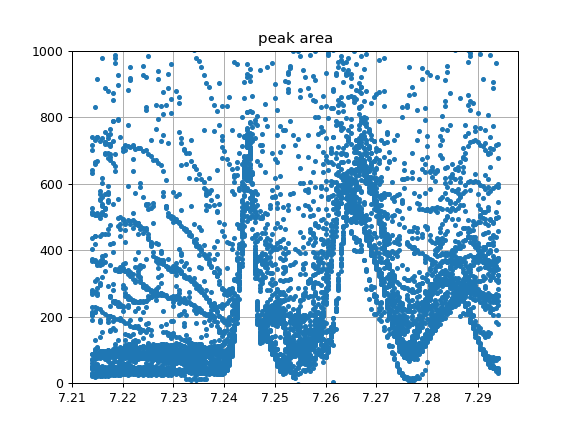

<IPython.core.display.Javascript object>


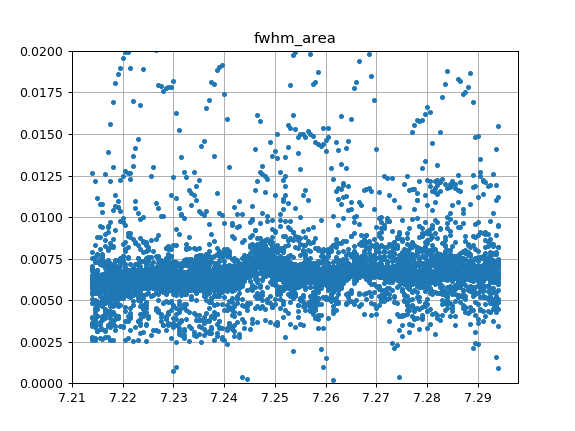

Frac. goodwith: 0.81


<IPython.core.display.Javascript object>


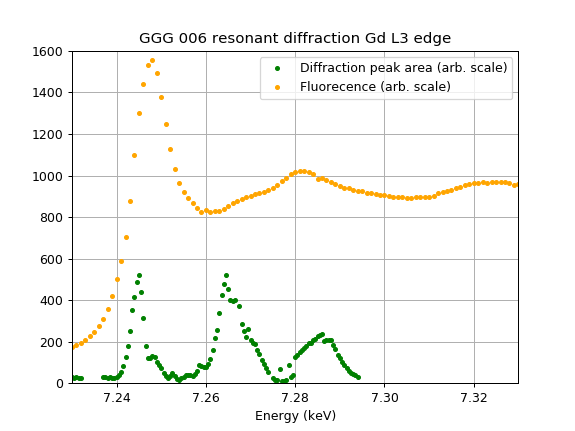

Text(0.5, 1.0, 'GGG 006 resonant diffraction Gd L3 edge')

In [33]:
l3_dict = pickle.load( open('/dls/science/users/spc93/data/ggg_l3_res_dict.p' , "rb" ) ) # load back from pickle file

(enlist, arealist) = filter_results(l3_dict)

figure()
plot(enlist, arealist, '.g', label = 'Diffraction peak area (arb. scale)')

p='/dls/i16/data/2020/cm26473-2/%i.nxs'
n = pdnx(p % 823333) # L3 fluo
n['i_norm'] = n['sum']/n.ic1monitor
plot(n['DCMenergy'], n['i_norm']/100, '.', color='orange', label = 'Fluorecence (arb. scale)'); grid(1)
xlim([7.23, 7.33]); ylim([0, 1600])
xlabel('Energy (keV)'); legend()
title('GGG 006 resonant diffraction Gd L3 edge')

In [35]:
savefig('GGG_Gd_L3_006.tiff')

In [27]:
import pickle

l2_scans = range(862374, 863881+1) # full l2 list

#p='/dls/i16/data/2020/mm25913-2/%i.nxs'
p='/dls/staging/dls/i16/data/2020/mm25913-2/%i.nxs'

l2_dict = analyse_images(l2_scans, p)

pickle.dump(l2_dict, open('/dls/science/users/spc93/data/ggg_l2_res_dict.p', "wb" ) )


Fri Feb  4 16:52:53 2022	/dls/staging/dls/i16/data/2020/mm25913-2/862400.nxs
Fri Feb  4 16:53:35 2022	/dls/staging/dls/i16/data/2020/mm25913-2/862500.nxs
Fri Feb  4 16:54:15 2022	/dls/staging/dls/i16/data/2020/mm25913-2/862600.nxs
Fri Feb  4 16:54:58 2022	/dls/staging/dls/i16/data/2020/mm25913-2/862700.nxs
Fri Feb  4 16:55:40 2022	/dls/staging/dls/i16/data/2020/mm25913-2/862800.nxs
Fri Feb  4 16:56:22 2022	/dls/staging/dls/i16/data/2020/mm25913-2/862900.nxs
Fri Feb  4 16:57:03 2022	/dls/staging/dls/i16/data/2020/mm25913-2/863000.nxs
Fri Feb  4 16:57:46 2022	/dls/staging/dls/i16/data/2020/mm25913-2/863100.nxs
Fri Feb  4 16:58:28 2022	/dls/staging/dls/i16/data/2020/mm25913-2/863200.nxs
Fri Feb  4 16:59:11 2022	/dls/staging/dls/i16/data/2020/mm25913-2/863300.nxs
Fri Feb  4 16:59:55 2022	/dls/staging/dls/i16/data/2020/mm25913-2/863400.nxs
Fri Feb  4 17:00:37 2022	/dls/staging/dls/i16/data/2020/mm25913-2/863500.nxs
Fri Feb  4 17:01:21 2022	/dls/staging/dls/i16/data/2020/mm25913-2/863600.nxs

<IPython.core.display.Javascript object>


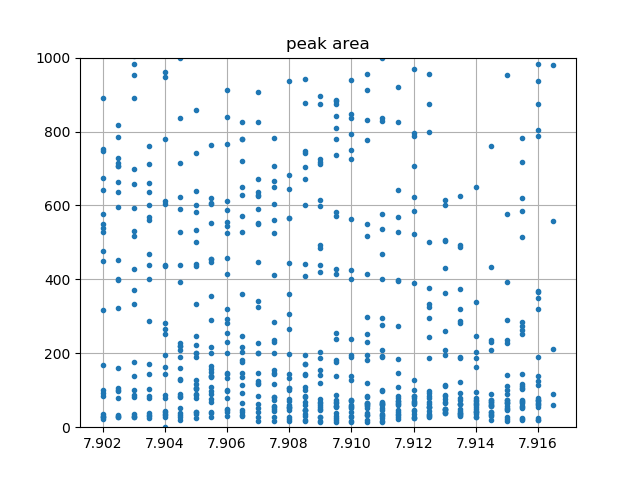

<IPython.core.display.Javascript object>


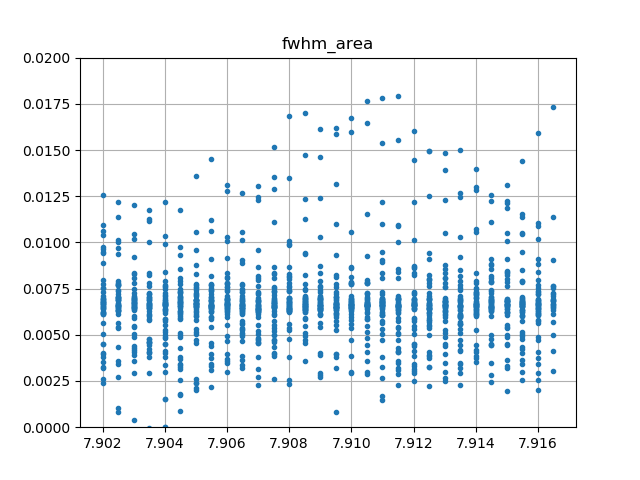

Frac. goodwith: 0.64


<IPython.core.display.Javascript object>


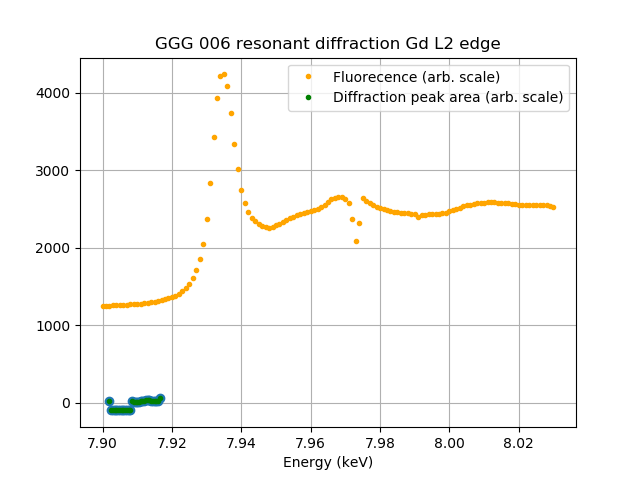

Text(0.5, 1.0, 'GGG 006 resonant diffraction Gd L2 edge')

In [28]:
l2_dict = pickle.load( open('/dls/science/users/spc93/data/ggg_l2_res_dict.p' , "rb" ) ) # load back from pickle file

(enlist, arealist) = filter_results(l2_dict)

figure()
plot(enlist, arealist, 'o')

p='/dls/i16/data/2020/cm26473-2/%i.nxs'
n = pdnx(p % 823332) # L2 fluo
n['i_norm'] = n['sum']/n.ic1monitor
plot(n['DCMenergy'], n['i_norm']/100, '.', color='orange', label = 'Fluorecence (arb. scale)'); grid(1)


plot(enlist, arealist, '.g', label = 'Diffraction peak area (arb. scale)')

xlabel('Energy (keV)'); legend()
title('GGG 006 resonant diffraction Gd L2 edge')






In [29]:
import pickle

#l1_scans = range(849362, 854159+1) # full l1 list
l1_scans = range(843463, 854159+1) # full l1 list


#p='/dls/i16/data/2020/mm25913-2/%i.nxs'
p='/dls/staging/dls/i16/data/2020/mm25913-2/%i.nxs'

l1_dict = analyse_images(l1_scans, p)

pickle.dump(l1_dict, open('/dls/science/users/spc93/data/ggg_l1_res_dict.p', "wb" ) )

Fri Feb  4 17:03:37 2022	/dls/staging/dls/i16/data/2020/mm25913-2/843500.nxs
Fri Feb  4 17:04:21 2022	/dls/staging/dls/i16/data/2020/mm25913-2/843600.nxs
Fri Feb  4 17:05:05 2022	/dls/staging/dls/i16/data/2020/mm25913-2/843700.nxs
Fri Feb  4 17:05:49 2022	/dls/staging/dls/i16/data/2020/mm25913-2/843800.nxs
Fri Feb  4 17:06:33 2022	/dls/staging/dls/i16/data/2020/mm25913-2/843900.nxs
Fri Feb  4 17:07:20 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844000.nxs
Fri Feb  4 17:08:05 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844100.nxs
Fri Feb  4 17:08:49 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844200.nxs
Fri Feb  4 17:09:33 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844300.nxs
Fri Feb  4 17:10:16 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844400.nxs
Fri Feb  4 17:11:00 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844500.nxs
Fri Feb  4 17:11:44 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844600.nxs
Fri Feb  4 17:12:29 2022	/dls/staging/dls/i16/data/2020/mm25913-2/844700.nxs

<IPython.core.display.Javascript object>


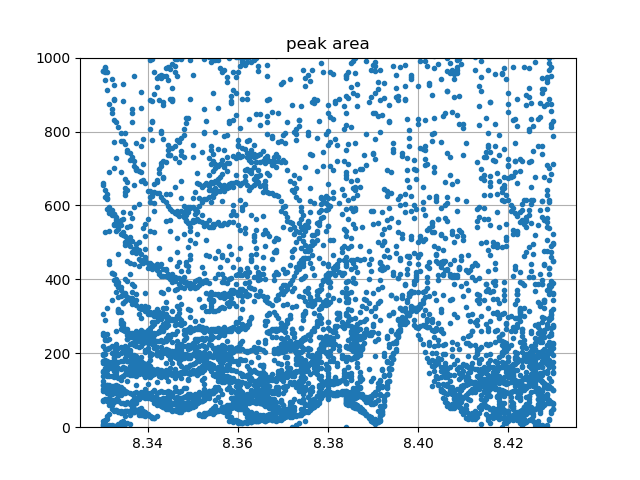

<IPython.core.display.Javascript object>


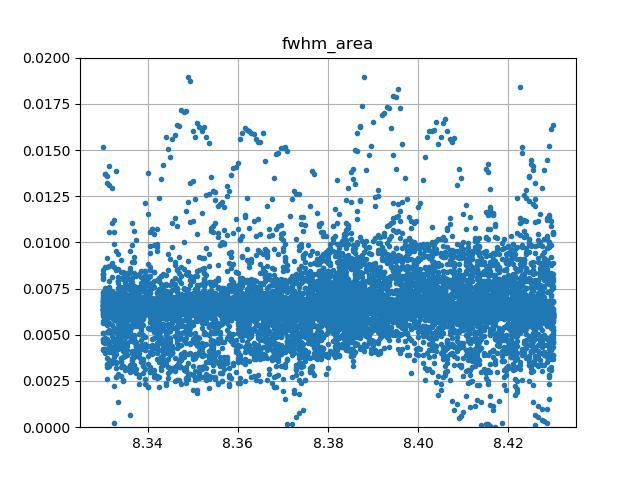

Frac. goodwith: 0.70


<IPython.core.display.Javascript object>


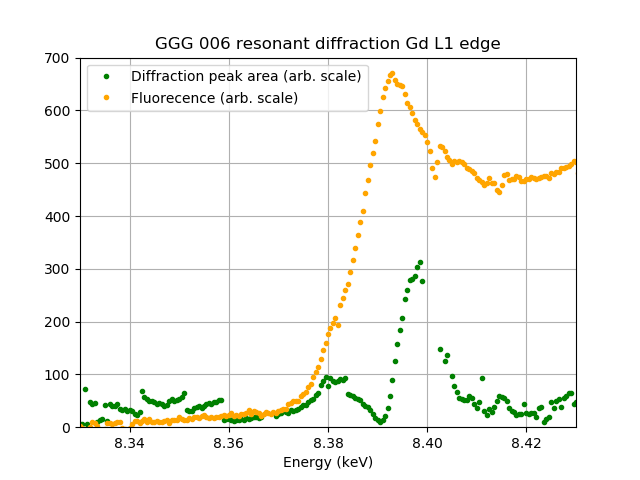

Text(0.5, 1.0, 'GGG 006 resonant diffraction Gd L1 edge')

In [39]:
l1_dict = pickle.load( open('/dls/science/users/spc93/data/ggg_l1_res_dict.p' , "rb" ) ) # load back from pickle file

(enlist, arealist) = filter_results(l1_dict)

figure()
#plot(enlist, arealist, 'o')
plot(enlist, arealist, '.g', label = 'Diffraction peak area (arb. scale)')

p='/dls/i16/data/2020/cm26473-2/%i.nxs'
n = pdnx(p % 823330) # L1 fluo
n['i_norm'] = n['sum']/n.ic1monitor
plot(n['DCMenergy'], n['i_norm']/100 - 2900, '.', color='orange', label = 'Fluorecence (arb. scale)'); grid(1)
xlim([8.33, 8.43]); ylim([0, 700])
xlabel('Energy (keV)'); legend()
title('GGG 006 resonant diffraction Gd L1 edge')






In [38]:
savefig('GGG_Gd_L1_006.tiff')

In [31]:
p='/dls/staging/dls/i16/data/2020/mm25913-2/%i.nxs'
scn, en = [], []
#for scan in range(843459, 843459+10):
for scan in range(843459, 863881+5): # last ten should be empty?
    scn += [scan]
    try:
        n = pdnx(p % scan)
        en += [n.nx.entry1.sample.beam.incident_energy]
    except:
        en += [0]  


=== Error loading NeXus file /dls/staging/dls/i16/data/2020/mm25913-2/843459.nxs


<IPython.core.display.Javascript object>


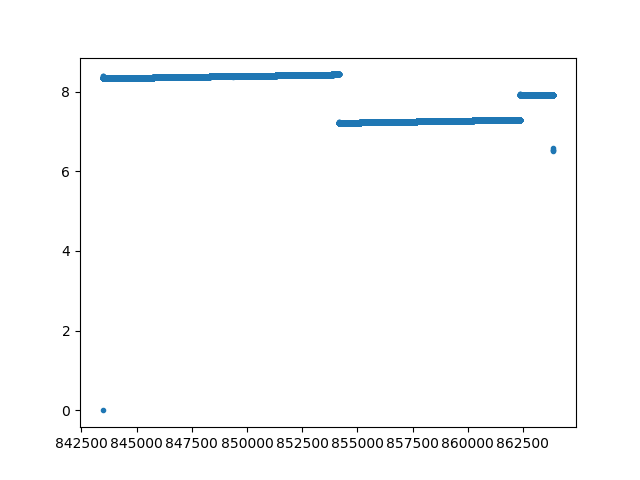

In [32]:
figure()
plot(scn, en, '.')